# erthaos_11

### README

Der Code stellt einen digitalen Assistent für die automatische Erkennung der gesuchten Motive.

Anpassbare Zeilen:

(#2) Pfad zu der eingabedatei.

(#5-91) Der Attributwert bestimmt die Herkunft der zu analysierenden Textgruppe (des Repertoires). Die Filter können mit den 'or' und 'and' Operatoren ergänzt werden, z. B.:  

if ('deu' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']

    or 'ita' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']): 
 
(#37) Stoppwortliste für die bestimmte Sprache
    
(#41-43) Anfrage anpassen. Der Wert kann in die Motivliste gesucht werden (siehe #40)-

(#82) Schwelenwert anpassen (Nummer des Merkmals mit minimal-positivem Koefizient, siehe #81)
    

# Trainieren

In [2]:
maerchen=""  #1 Eine leere Zeichenfolge, die später mit den gewünschten Daten gefüllt wird
import xml.etree.ElementTree as ET

#2 Parsing der XML-Datei und Extrahieren der Wurzel des Baums
root_node = ET.parse('Textkorpus.xml').getroot()

#3 Eine Variable, um zu überprüfen, ob Daten gespeichert wurden
never_saved = True

#4 Iteration über alle Textabschnitte in der XML-Datei
for ganze in root_node.findall(".//{http://www.tei-c.org/ns/1.0}text"):
    #5 Überprüfen, ob der Text zu dem bestimmten Repertoire gehört 
    if ('' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']):
        
        #6 Iteration über alle Abschnitte des Textes
        for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
            for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                
                #7 Iteration über alle Sätze im Absatz
                for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                    #8 Extrahieren der Annotationen für verschiedene Kategorien
                    labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                    labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                    labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                    labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                    labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                    labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                    labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                    labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                    labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                    labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                    labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                    labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                    quelle= ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']

                    #9 Extrahieren des Inhalts des Satzes und Bereinigen
                    inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                              .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                              .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                              .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                              .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                              .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                              .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                              .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                              .replace(')','').replace('*','').replace("\n","\n")
                              .replace("'''",""))

                    #10 Überprüfen der Annotationen 
                    if labela.startswith('a') and labela!='N':
                        #11 Wenn labela mit 'a' beginnt und nicht gleich 'N' ist, wird der Satz hinzugefügt
                        maerchen += (quelle+','+labela+','+labelb1+','+labelc1+','+labelb2+','
                                     +labelc2+','+labelb3+','+labelc3+','+labelb4+','+labelc4+','
                                     +labelb5+','+labelc5+','+labeld+','+inhalt+',0'+'\n')

#12 Schreiben der Daten in eine CSV-Datei
with open("text.csv", 'w', encoding='utf-8') as f:
    #13 Schreiben der Kopfzeile
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    #14 Schreiben der Daten
    f.write(maerchen)

In [3]:
#15 leere Zeichenfolge, die später mit den gewünschten Daten gefüllt werden
abcd1="" 
abcd2="" 
abcd3=""  
abcd4=""  
abcd5=""  

import pandas as pd  
from collections import Counter

#16 Lesen der CSV-Datei und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text.csv',  encoding='utf-8')

#17.1 Hinzufügen von Daten zu den entsprechenden Variablen abcd1 bis abcd5
#17.2 Hier werden die Daten aus verschiedenen Spalten des DataFrame kombiniert
abcd1 += df.quelle+','+df.labela+':'+df.labelb1+':'+df.labelc1+':'+df.labeld+','+df.inhalt+',0'
abcd2 += df.quelle+','+df.labela+':'+df.labelb2+':'+df.labelc2+':'+df.labeld+','+df.inhalt+',0'
abcd3 += df.quelle+','+df.labela+':'+df.labelb3+':'+df.labelc3+':'+df.labeld+','+df.inhalt+',0'
abcd4 += df.quelle+','+df.labela+':'+df.labelb4+':'+df.labelc4+':'+df.labeld+','+df.inhalt+',0'
abcd5 += df.quelle+','+df.labela+':'+df.labelb5+':'+df.labelc5+':'+df.labeld+','+df.inhalt+',0'

#18 Zusammenführen der Daten aus den Variablen abcd1 bis abcd5
recorded=(abcd1+'\n'+abcd2+'\n'+abcd3+'\n'+abcd4+'\n'+abcd5+'\n')

#19 Schreiben der kombinierten Daten in eine neue CSV-Datei
with open("text_aw.csv", 'w', encoding='utf-8') as w:
    #20 Schreiben der Kopfzeile
    w.write('quelle,index_string,inhalt,index_binar\n')
    #21 Schreiben der vordefinierten Zeile mit Dummy-Daten
    w.write('000:ballast,ballast,ballast,0\n')
    #22 Schreiben der kombinierten Daten
    w.write("".join(recorded))
    #23 Schließen der Datei
    w.close()

In [4]:
import csv  

mom=[]  #24 Eine leere Liste zum Speichern der Zeilen, die bestimmten Kriterien entsprechen

#25 Lesen der CSV-Datei 'text_aw.csv'
with open('text_aw.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f) 
    #26 Iteration über jede Zeile in der CSV-Datei
    for line in reader:
        #27 Überprüfen, ob die Zeile nicht das Muster ':N:' in der zweiten Spalte enthält
        if ':N:' not in line[1]:
            #28 Wenn das Muster nicht vorhanden ist, wird die Zeile der Liste 'mom' hinzugefügt
            mom.append(line)

#29 Kopieren der Datei text_ax.txt
import shutil, os
with open ('text_ax.txt', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(mom)

#30 Öffnen der Datei text_ax.txt zum Lesen
with open('text_ax.txt', 'r', encoding='utf-8') as file:
    #31 Lesen des gesamten Inhalts der Datei
    filedata = file.read()

#32 Bearbeiten des Dateiinhalts, um das gewünschte Format zu erzielen
filedata = (filedata.replace(']","[', "\n").replace('"[','').replace(']"','')
            .replace(" '","").replace("'",""))

#33 Schreiben des bearbeiteten Inhalts in eine neue CSV-Datei text_ay.csv
with open('text_ay.csv', 'w', encoding='utf-8') as file:
    file.write(filedata)

In [5]:
custom_stop_word_list=['johannes']  #34 Eine leere Liste, um benutzerdefinierte Stoppwörter zu speichern

import nltk
nltk.download('stopwords')  #35 Herunterladen der Stoppwortliste aus der NLTK-Datenbank

from nltk.corpus import stopwords  #36 Importieren der Stoppwortliste aus NLTK
NLTK_stop_words_list=stopwords.words('german')  #37 Laden der Stoppwortliste für die bestimmte Sprache
stpw = custom_stop_word_list + NLTK_stop_words_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elguj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import pandas as pd  
from collections import Counter

#38 Lesen der CSV-Datei 'text_ay.csv' und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text_ay.csv',  encoding='utf-8')

#39 Zählen der Vorkommen jeder Zeichenfolge in der Spalte 'index_string'
indexliste = Counter(df.index_string)

#40 Ausgabe der einzigartigen Zeichenfolgen in der Spalte 'index_string'
print(*indexliste, sep='\n')

ballast
a551:h:Krankheit:rHH
a551:F:Anregen_zu_Beauftragungen:rHH_rVB
a551:F:Heilmittel_beschaffen:rHH_fHD
a551:f:Anlocken:fHD_fVB
a551:h:Anlocken_nachgehen:fHD_fVB
a551:f:Festnahme_bzw_Sperren:fHD_fVB
a551:F:Werben_um_den_Auftrag:rHD_rHH
a551:f:Anlocken:rHD_fVB
a551:H:Anlocken_nachgehen:rHD_fVB
a551:H:Reittier_erhalten:rHD_rST
a551:Hh:Überweisung_an_anderen_Stifter_oder_Helfer:rHD_rST
a551:H:Handlungsanweisung_Heilmittel_ergreifen:rHD_rST
a551:H:Besitzer_des_Objektes_ergreifen:rHD_rBZ
a551:F:Markieren:rHD_rBZ
a551:H:Heilmittel_ergreifen:rHD_rBZ
a551:h:Kontakt_abbrechen:rHD_rBZ
a551:H:Pförtner_entkommen:rHD_fHF
a551:F:Zurückgreifen:rHD_rST_rZM
a551:H:Zaubermittel_erhalten:rHD_rST_rZM
a551:H:Reittier_erhalten:rHD_rST_rZM
a551:H:Handlungsanweisung_Missetat_beheben:rHD_rST_rZM
a551:Hh:Handlungsanweisung_missachten:N
a551:Hh:Sorge_um_Freikaufsbedürftigen:N
a551:h:Missetat_planen:fHD
a551:f:Todesauftrag:rHD_rVB_fHD
a551:H:Todesauftrag_entkommen:rHD_rVB_fHD
a551:h:Verbannung:rHD_rVB_fHD
a551

In [7]:
#41 Definieren der Variablen
gesep_a ="a300:"
gesep_b = "F:Menschliche_Opfergabe_beheben:"
gesep_c = ""
gesep_d = ""


In [8]:
#42 Iteration über die Zeilen des DataFrames df
for i, gesuchte_label in enumerate(df.index_string):
    
    #43 Überprüfen, ob gesep_a-d in der aktuellen Zeile gesuchte_label vorhanden ist
    if gesep_a in gesuchte_label and gesep_b in gesuchte_label:#44 or gesep_c in gesuchte_label:# or gesep_d in gesuchte_label:
        print(i, gesuchte_label)
        #45 Wenn gesep_a-d gefunden wurde, markiere die entsprechende Zeile in der Spalte 'index_binar' als '1'
        df.index_binar.iloc[i]='1'

#46 Speichern des aktualisierten DataFrames in einer CSV-Datei 'text_lab.csv'
df.to_csv('text_lab.csv', encoding='utf-8', index=False)

394 a300:F:Menschliche_Opfergabe_beheben:rHD
421 a300:F:Menschliche_Opfergabe_beheben:rHD_rVB
429 a300:F:Menschliche_Opfergabe_beheben:rHD_rPP_fHD
434 a300:F:Menschliche_Opfergabe_beheben:rHD


C:\Users\elguj\AppData\Local\Temp\ipykernel_3712\3039426821.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.index_binar.iloc[i]='1'


In [9]:
#47 Vielfache Inhalte auf einen reduzieren
def filter_csv(input_file, output_file):
    data_to_write = []
    with open(input_file, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        data = list(reader)
        processed_values = set()
        for row in data:
            if row[2] not in processed_values:
                if row[3] == '1':
                    data_to_write.append(row)
                    processed_values.add(row[2])
                elif row[3] == '0':
                    data_to_write.append(row)
                    processed_values.add(row[2])
            else:
                if row[3] == '0':
                    continue
    with open(output_file, 'w', newline='') as csvfile:
        csvfile.write("quelle,index_string,inhalt,index_binar")
        csvfile.write('\n')
        writer = csv.writer(csvfile)
        writer.writerows(data_to_write)

#48 Beispielaufruf:
filter_csv('text_lab.csv', 'text_labred.csv')

In [10]:
#49 Lesen der CSV-Datei 'text_lab.csv' und Laden der Daten in ein Pandas DataFrame
df = pd.read_csv('text_labred.csv',  encoding='utf-8')

#50 Extrahieren der Trainingsdaten X_train und der Labels y_train
X_train = df['inhalt']  # Inhalt der Texte
y_train = df['index_binar']  # Binäre Indikatoren

#51 Zählen der Vorkommen jeder Binärklasse in der Spalte 'index_binar'
indexliste = Counter(df.index_binar)

#52 Ausgabe der Anzahl der Vorkommen jeder Binärklasse
print(indexliste)

Counter({0: 249, 1: 4})


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import GridSearchCV  
from sklearn.pipeline import make_pipeline  

#53 Definieren der Pipeline mit einem TF-IDF-Vektorisierer und einem logistischen Regressionsmodell
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words=stpw, ngram_range=(1,1), norm=None), 
                     LogisticRegression())

#54 Definieren des Rastersuchgitters für den Regularisierungsparameter C des logistischen Regressionsmodells
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}     

#55 Erstellen eines Rastersuchobjekts mit der Pipeline und dem Rastersuchgitter, das auf 5-facher Kreuzvalidierung basiert
grid = GridSearchCV(pipe, param_grid, cv=5)

#56 Anpassen der Rastersuche an die Trainingsdaten
grid.fit(X_train, y_train)

#57 Drucken des besten Scores aus der Kreuzvalidierung
print("Bester Score aus der Kreuzvalidierung: {:.2f}".format(grid.best_score_))

C:\Users\elguj\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Bester Score aus der Kreuzvalidierung: 0.98


In [12]:
import numpy as np

#58 Extrahieren des TF-IDF-Vektorisierers aus dem besten Schätzschritt des Gittersuchlaufs
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

#59 Ermitteln des maximalen TF-IDF-Werts für jedes Merkmal
max_value = vectorizer.transform(X_train).max(axis=0).toarray().ravel()

#60 Sortieren der Merkmale nach ihren TF-IDF-Werten
sorted_by_tfidf = max_value.argsort()

#61 Extrahieren der Merkmalsnamen aus dem Vektorisierer
feature_names = np.array(vectorizer.get_feature_names_out())
print("Gesamte Anzahl der Wörter: {}".format(len(vectorizer.vocabulary_)))

Gesamte Anzahl der Wörter: 924


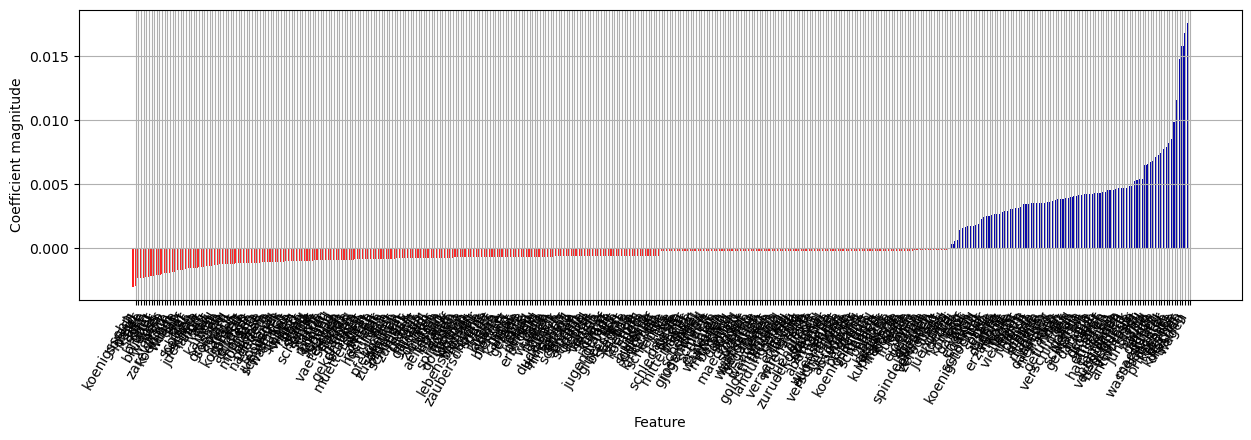

In [13]:
s_zahl = 200  #62 Anzahl der Merkmale, die in der Visualisierung dargestellt werden sollen

import matplotlib.pyplot as plt  
import mglearn

#63 Visualisieren der Koeffizienten des logistischen Regressionsmodells
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,  # Koeffizienten des Modells
    feature_names,  n_top_features=s_zahl  # Merkmalsnamen und Anzahl der Merkmale, die visualisiert werden sollen
)

#64 Anzeigen des Gitters in der Visualisierung
plt.grid()

#65 Anzeigen der Visualisierung
plt.show()

In [14]:
#66 Extrahieren der Koeffizienten aus dem logistischen Regressionsmodell
gio = grid.best_estimator_.named_steps["logisticregression"].coef_[0]

#67 Sortieren der Indizes der Koeffizienten nach ihrer Größe
n_top = np.argsort(gio)

#68 Sortieren der Koeffizienten nach ihrer Größe
z_top = np.sort(gio)

#69 Extrahieren der Top-Merkmale mit den höchsten Koeffizienten
text_pos = feature_names[n_top[-s_zahl:]]
zahl_pos = gio[n_top[-s_zahl:]]

#70 Extrahieren der Top-Merkmale mit den niedrigsten Koeffizienten
text_neg = feature_names[n_top[0:s_zahl]]
zahl_neg = gio[n_top[0:s_zahl]]

#71 Ausgabe der positiven Merkmale und ihrer Koeffizienten
print("Positive Merkmale:\n{}".format(text_pos))

#72 Ausgabe der negativen Merkmale und ihrer Koeffizienten
# print("Negative Merkmale:\n{}".format(text_neg))

#73 Ausgabe der Koeffizienten der positiven Merkmale
# print("Positive coef:\n{}".format(zahl_pos))

#74 Ausgabe der Koeffizienten der negativen Merkmale
# print("Negative coef:\n{}".format(zahl_neg))

Positive Merkmale:
['nie' 'schenkte' 'rechts' 'links' 'eile' 'iss' 'baume' 'schlechteste'
 'strafe' 'weder' 'mitternacht' 'papier' 'gute' 'herr' 'schenkel' 'siegel'
 'grossmutter' 'jugendland' 'meint' 'schlaeft' 'rat' 'erschien' 'neuen'
 'wackeren' 'worten' 'mittleren' 'berufen' 'blind' 'dorthin' 'sollen'
 'schuld' 'maechtiger' 'heller' 'koennt' 'suchten' 'ruhig' 'wuensche'
 'wallfisches' 'vergehen' 'begangen' 'brust' 'legen' 'wanderten' 'werfen'
 'goldstimmigen' 'kruege' 'tausend' 'landungssteg' 'genau' 'lag' 'reiter'
 'empfing' 'fische' 'veraenderung' 'wuenschte' 'ehe' 'fisch' 'fliesst'
 'juenglinge' 'zurueckgekehrt' 'busen' 'dreimal' 'zweimal' 'abenteuer'
 'gabe' 'mache' 'haupt' 'wuenschest' 'augenblicke' 'verschwanden' 'blies'
 'pfeife' 'vergelten' 'abschiede' 'wunder' 'weibe' 'beistand' 'trunk'
 'koenigssohne' 'mitsamt' 'bitten' 'schnabel' 'rabe' 'behielt' 'heisst'
 'bisher' 'herrscht' 'versuche' 'kupferberg' 'maehne' 'flatterte' 'bogen'
 'seen' 'fluesse' 'fegte' 'steh' 'ewig' 'ei

In [15]:
kfz = range(s_zahl)  #75 Erstellen einer Sequenz von Zahlen von 0 bis s_zahl-1
folgenum = 0  #76 Initialisieren des Zählers für die Folgennummer

#77 Iteration über die Zahlen in der Sequenz kfz
for x in kfz:
    folgenum += 1  #78 Inkrementieren der Folgennummer
    #79 Berechnen der Summe der Koeffizienten für das aktuelle Element in der Liste
    vollliste = zahl_pos[s_zahl - folgenum] + zahl_neg[s_zahl - folgenum]
    #80 Runden der Summe auf drei Dezimalstellen
    rundliste = round(vollliste, 3)
    #81 Ausgabe der gerundeten Summe und der aktuellen Zahl in der Sequenz
    print(rundliste, '-', x)

0.017 - 0
0.016 - 1
0.015 - 2
0.014 - 3
0.011 - 4
0.009 - 5
0.008 - 6
0.008 - 7
0.007 - 8
0.007 - 9
0.007 - 10
0.007 - 11
0.007 - 12
0.006 - 13
0.006 - 14
0.006 - 15
0.006 - 16
0.005 - 17
0.005 - 18
0.005 - 19
0.005 - 20
0.004 - 21
0.004 - 22
0.004 - 23
0.004 - 24
0.004 - 25
0.004 - 26
0.004 - 27
0.004 - 28
0.004 - 29
0.004 - 30
0.004 - 31
0.004 - 32
0.004 - 33
0.004 - 34
0.004 - 35
0.004 - 36
0.004 - 37
0.004 - 38
0.004 - 39
0.004 - 40
0.003 - 41
0.003 - 42
0.003 - 43
0.003 - 44
0.003 - 45
0.003 - 46
0.003 - 47
0.003 - 48
0.003 - 49
0.003 - 50
0.003 - 51
0.003 - 52
0.003 - 53
0.003 - 54
0.003 - 55
0.003 - 56
0.003 - 57
0.003 - 58
0.003 - 59
0.003 - 60
0.003 - 61
0.003 - 62
0.002 - 63
0.002 - 64
0.002 - 65
0.002 - 66
0.002 - 67
0.002 - 68
0.002 - 69
0.002 - 70
0.002 - 71
0.002 - 72
0.002 - 73
0.002 - 74
0.002 - 75
0.002 - 76
0.002 - 77
0.002 - 78
0.001 - 79
0.001 - 80
0.001 - 81
0.001 - 82
0.001 - 83
0.001 - 84
0.001 - 85
0.001 - 86
-0.0 - 87
-0.0 - 88
-0.0 - 89
-0.001 - 90
-0.001 - 91

In [16]:
#82 Schwelenwert bestimmen
sw=70

In [17]:
filename ='!_neu'  #83 Der Dateiname für die CSV-Datei (ohne Erweiterung)
tit = (text_pos[s_zahl-sw:s_zahl])  # Die Titelzeile, die geschrieben werden soll

#84 Öffnen der CSV-Datei zum Schreiben ('wt' für Schreiben im Textmodus)
with open (filename+'.csv', 'wt', encoding='utf-8') as f:
    writer = csv.writer(f)  #85 Initialisieren des CSV-Schreibers
    writer.writerow(tit)  #86 Schreiben der Titelzeile in die CSV-Datei

# Vorhersage

In [18]:
maerchen = ""  #87 Eine leere Zeichenfolge zum Speichern der Daten

import xml.etree.ElementTree as ET  

#88 Parsen des XML-Dokuments und Abrufen der Wurzel des Baums
root_node = ET.parse('Textkorpus.xml').getroot()

never_saved = True  

#90 Iteration über alle 'text'-Elemente im XML-Dokument
for ganze in root_node.findall(".//{http://www.tei-c.org/ns/1.0}text"):
    #91 Überprüfen, ob der Text zu dem bestimmten Repertoire gehört
    if '' in ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']:
        
        #91 Iteration über alle 'body'-Elemente im 'text'-Element
        for body in ganze.findall(".//{http://www.tei-c.org/ns/1.0}body"):
            
            #92 Iteration über alle 'p'-Elemente im 'body'-Element
            for absatz in body.findall(".//{http://www.tei-c.org/ns/1.0}p"):
                
                #93 Iteration über alle 'seg'-Elemente im 'p'-Element
                for phrase in absatz.findall(".//{http://www.tei-c.org/ns/1.0}seg"):
                    # Extrahieren der Attributwerte für die einzelnen Annotationen
                    labela = phrase.attrib['{www.dglab.uni-jena.de/vmf/a}ana']
                    labelb1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b1}ana']
                    labelb2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b2}ana']
                    labelb3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b3}ana']
                    labelb4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b4}ana']
                    labelb5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/b5}ana']
                    labelc1 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c1}ana']
                    labelc2 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c2}ana']
                    labelc3 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c3}ana']
                    labelc4 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c4}ana']
                    labelc5 = phrase.attrib['{www.dglab.uni-jena.de/vmf/c5}ana']
                    labeld = phrase.attrib['{www.dglab.uni-jena.de/vmf/d}ana']
                    quelle = ganze.attrib['{http://www.w3.org/XML/1998/namespace}id']
                    
                    #94 Extrahieren und Bereinigen des Textinhalts
                    inhalt = (phrase.text.lower().strip().replace('|','').replace(':','').replace("ä","ae")
                              .replace("ü","ue").replace("ö","oe").replace("ß","ss").replace(",","")
                              .replace("«","").replace("»","").replace(".","").replace('=',' ').replace(";","")
                              .replace('"',"").replace("?","").replace("!","").replace("á","a").replace(",","")
                              .replace("\t"," ").replace("'","").replace("‹","").replace("›","").replace("-"," ")
                              .replace("'('","").replace("')'","").replace('>','').replace("    "," ")
                              .replace("   "," ").replace("  "," ").replace('–','').replace('—','').replace('<','')
                              .replace("Â", "A").replace("ø", "oe").replace('“','').replace('„','').replace('(','')
                              .replace(')','').replace('*','').replace("\n","\n")
                              .replace("'''",""))
                    
                    #95 Überprüfen, ob das Label mit 'N' beginnt (Negative-Klasse)
                    if labela.startswith('N'):
                        #96 Zusammenstellen der Zeile mit den Daten und Hinzufügen zur Zeichenfolge 'maerchen'
                        maerchen += (quelle + ',' + labela + ',' + labelb1 + ',' + labelc1 + ',' + labelb2 + ',' + labelc2 + ','
                                     + labelb3 + ',' + labelc3 + ',' + labelb4 + ',' + labelc4 + ',' + labelb5 + ',' + labelc5 + ','
                                     + labeld + ',' + inhalt + ',0' + '\n')

#97 Öffnen der CSV-Datei zum Schreiben
with open("text.csv", 'w', encoding='utf-8') as f:
    #98 Schreiben der Kopfzeile in die CSV-Datei
    f.write('quelle,labela,labelb1,labelc1,labelb2,labelc2,labelb3,labelc3,labelb4,labelc4,labelb5,labelc5,labeld,inhalt,index_binar')
    f.write('\n')
    #99 Schreiben der gesammelten Daten in die CSV-Datei
    f.write(maerchen)

In [19]:
#100 Öffnen der CSV-Datei im Lesemodus und Lesen ihres Inhalts
with open(filename+'.csv', 'r', encoding='utf-8') as file:
    file_contents = file.read().replace(",", " ").replace("\n", "")  # Entfernen von Kommas und Zeilenumbrüchen

#101 Zusammenstellen des neuen Inhalts mit dem Dateinamen und zusätzlichen Metadaten
frt_contents = filename+',N,N,N,N,N,N,N,N,N,N,N,N'+','+file_contents+',0'

#102 Löschen der ursprünglichen CSV-Datei
import os  # Importieren des os-Moduls für Betriebssystemoperationen
os.remove(filename+'.csv')

In [20]:
row = [frt_contents]  #103 Erstellen einer neuen Zeile mit dem zusammengestellten Inhalt

#104 Öffnen der CSV-Datei im Lesemodus und Lesen der vorhandenen Zeilen
with open("text.csv", 'r', encoding='utf-8') as readFile:
    rd = csv.reader(readFile)  #105 Initialisieren des CSV-Lesers
    lines = list(rd)  #106 Lesen der Zeilen und Konvertieren in eine Liste

    #107 Einfügen der neuen Zeile an der zweiten Position in die Liste der Zeilen
    lines.insert(1, row)

#108 Öffnen der CSV-Datei im Schreibmodus und Schreiben der aktualisierten Zeilen
with open("text.csv", 'wt', newline='', encoding='utf-8') as writeFile:
    wt = csv.writer(writeFile)  #109 Initialisieren des CSV-Schreibers
    wt.writerows(lines)  #110 Schreiben der Zeilen in die Datei

#111 Öffnen der ursprünglichen und neuen CSV-Dateien zum Lesen bzw. Schreiben
fin = open('text.csv', 'r', encoding='utf-8')
fout = open('text_reich.csv', "wt", encoding='utf-8')

#112 Iteration über die Zeilen der ursprünglichen CSV-Datei
for kfz in fin:
    #113 Schreiben der Zeile in die neue Datei mit Entfernung bestimmter Zeichenfolgen
    fout.write(kfz.replace('"', ''))
#114 Schließen beider Dateien
fin.close()
fout.close()

In [21]:
#115 Funktion für die Beseitigung der leeren Datensätzen
def delete_records_with_empty_field(file_path, field_name):
    
    #116 Öffnen der CSV-Datei im Lese-Modus
    with open(file_path, 'r') as file:
        #117 Lesen der Daten als Liste von Dictionaries
        reader = csv.DictReader(file)
        rows = list(reader)

    #118 Überprüfen, ob das Feld in den Daten leer ist
    filtered_rows = [row for row in rows if row[field_name]]

    #119 Öffnen der CSV-Datei im Schreibmodus und Schreiben der verbleibenden Datensätze
    with open(file_path, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=reader.fieldnames)
        writer.writeheader()
        writer.writerows(filtered_rows)

#120 Beispielaufruf der Funktion
file_path = 'text_reich.csv'  #121 Passe den Pfad zu deiner CSV-Datei an
field_name = 'inhalt'  #122 Passe den Namen des Feldes an, das überprüft werden soll
delete_records_with_empty_field(file_path, field_name)

In [22]:
t_corpus = []  #123 Eine leere Liste zum Speichern der Textdaten
df = pd.read_csv('text_reich.csv', encoding='utf-8')  #124 Einlesen der CSV-Datei in ein Pandas DataFrame
file = 'text_reich.csv'  #125 Der Dateiname der CSV-Datei

#126 Öffnen der CSV-Datei im Lesemodus und Extrahieren der Textdaten
with open(file, "rt", encoding='utf-8') as maerchen:
    maercho = df.inhalt  #127 Extrahieren der Spalte "inhalt" aus dem DataFrame
    reader = csv.reader(maercho)  #128 Initialisieren des CSV-Lesers
    for row in reader:
        lst = str(row)  #129 Konvertieren der gelesenen Zeile in eine Zeichenfolge
        t_corpus.append(lst)  #130 Hinzufügen der Zeichenfolge zur Liste der Textdaten

## Vorhersage durch Logistic Regression

In [23]:
#131 Vorhersagen für die Testdaten mit dem trainierten Modell durchführen
mod_pred = grid.predict(t_corpus)

#132 Iteration über die Indizes und Vorhersagen
for index, prediction in enumerate(mod_pred):
    #133 Überprüfen, ob die Vorhersage positiv ist
    if prediction == 1:
        #134 Ausgabe des Index und der Vorhersage für positiv bewertete Datensätze
        print('Positiv bewerteter Datensatz: {}'.format(index))

In [24]:
#135 Vorhersagen für die Testdaten mit der Methode `predict_proba` durchführen
all_pred = grid.predict_proba(t_corpus)

#136 Sortieren der Indizes der Testdaten basierend auf der Wahrscheinlichkeit positiver Vorhersagen in absteigender Reihenfolge
sort_index = np.flip(all_pred[:, 1].argsort())

#137 Iteration über die sortierten Indizes der Testdaten
for num_pos in sort_index:
    #138 Extrahieren der Wahrscheinlichkeit der positiven Vorhersage für das aktuelle Datenpunkt
    pos = all_pred[num_pos][1]
    
    #139 Iteration über die Indizes und Datenpunkte der Testdaten
    for i, t_corpus_element in enumerate(t_corpus):
        #140 Überprüfen, ob der Index mit dem sortierten Index übereinstimmt und die Wahrscheinlichkeit hoch genug ist
        if i == num_pos and num_pos >= 0 and pos >= 0.001:
            #141 Ausgabe des Index, der Wahrscheinlichkeit, der Quelle, dem Inhalt und der Index-Binarisierung
            print(num_pos, '-', pos, '-', df.quelle[num_pos], '-', df.inhalt[num_pos],
                  '-', df.index_binar[num_pos], '\n')

579 - 0.09426421183406436 - dummy42 - einst begegnete ihm ein wagen mit zwei pferden bespannt und ganz mit schwarzen decken bekleidet und auch der kutscher war schwarz angetan in dem wagen sass ein wunderschoenes maedchen in einem schwarzen gewande das weinte bitterlich die pferde trabten traurig und langsam und hingen die koepfe kutscher was bedeutet das fragte der schaefer der kutscher antwortete unwirsch jener aber liess nicht nach zu fragen bis der kutscher erzaehlte es hause ein grosser drache in der gegend dem habe man um sich vor seinen verwuestungen zu sichern eine jungfrau als jaehrlichen tribut versprechen muessen die er mit haut und haar verschlinge das los entscheide allemal unter den vierzehnjaehrigen jungfrauen und diesmal habe es die koenigstochter betroffen darueber sei der koenig und das ganze land in tiefster betruebnis und doch muesse der drache sein opfer erhalten der schaefer fuehlte mitleid mit dem schoenen jungen maedchen und folgte dem wagen dieser hielt endlich

4877 - 0.019956991230059545 - dummy405 - als der bauer weggefahren war sagte der eine von ihnen diese lampe koennten wir brauchen wir haben daheim einen eichbaum der ebenso gross ist daran koennen wir sie haengen was fuer eine freude wenn wir nachts nicht in der finsternis herumtappen wisst ihr was sprach der zweite wir wollen wagen und pferde holen und den mond wegfuehren sie koennen sich hier einen andern kaufen ich kann gut klettern sprach der dritte ich will ihn schon herunterholen der vierte brachte einen wagen mit pferden herbei und der dritte stieg den baum hinauf bohrte ein loch in den mond zog ein seil hindurch und liess ihn herab als die glaenzende kugel auf dem wagen lag deckten sie ein tuch darueber damit niemand den raub bemerken sollte sie brachten ihn gluecklich in ihr land und stellten ihn auf eine hohe eiche alte und junge freuten sich als die neue lampe ihr licht ueber alle felder leuchten liess und stuben und kammern damit erfuellte die zwerge kamen aus den felsenhoe

5915 - 0.018508111279774305 - dummy508 - auf eine zeit ging das huehnchen mit dem haehnchen in den nussberg und sie machten miteinander aus wer einen nusskern faende sollte ihn mit dem andern teilen nun fand das huehnchen eine grosse grosse nuss sagte aber nichts davon und wollte den kern allein essen der kern war aber so dick dass es ihn nicht hinunterschlucken konnte und er ihm im hals stecken blieb dass ihm angst wurde es muesste ersticken da schrie das huehnchen haehnchen ich bitte dich lauf was du kannst und hol mir wasser sonst erstick ich das haehnchen lief was es konnte zum brunnen und sprach born du sollst mir wasser geben das huehnchen liegt auf dem nussberg hat einen grossen nusskern geschluckt und will ersticken der brunnen antwortete lauf erst hin zur braut und lass dir rote seide geben das haehnchen lief zur braut braut du sollst mir rote seide geben rote seide will ich dem brunnen geben der brunnen soll mir wasser geben das wasser will ich dem huehnchen bringen das liegt

5925 - 0.017903053661997518 - dummy509 - nun zogen sie weiter und kamen in ein reich da hoerten sie dass die koenigstochter todkrank laege hallo bruder sprach der soldat zum heiligen petrus da ist ein fang fuer uns wenn wir die gesund machen so ist uns auf ewige zeiten geholfen da war ihm der heilige petrus nicht geschwind genug nun heb die beine auf bruderherz sprach er zu ihm dass wir noch zu rechter zeit hinkommen der heilige petrus ging aber immer langsamer wie auch der bruder lustig ihn trieb und schob bis sie endlich hoerten die koenigstochter waere gestorben da haben wirs sprach der bruder lustig das kommt von deinem schlaefrigen gang sei nur still antwortete der heilige petrus ich kann noch mehr als kranke gesund machen ich kann auch tote wieder ins leben erwecken nun wenn das ist sagte der bruder lustig so lass ich mirs gefallen das halbe koenigreich musst du uns aber zum wenigsten damit verdienen darauf gingen sie in das koenigliche schloss wo alles in grosser trauer war der 

5464 - 0.01744263827423484 - dummy461 - es war einmal ein huehnchen und ein haehnchen die wollten zusammen eine reise machen da baute das haehnchen einen schoenen wagen der vier rote raeder hatte und spannte vier maeuschen davor das huehnchen setzte sich mit dem haehnchen auf und sie fuhren miteinander fort nicht lange so begegnete ihnen eine katze die sprach wo wollt ihr hin haehnchen antwortete - 0 

5481 - 0.017439967533546662 - dummy464 - bald hernach verfiel die tochter des koenigs in eine schwere krankheit sie war sein einziges kind er weinte tag und nacht dass ihm die augen erblindeten und liess bekanntmachen wer sie vom tode errettete der sollte ihr gemahl werden und die krone erben der arzt als er zu dem bette der kranken kam erblickte den tod zu ihren fuessen er haette sich der warnung seines paten erinnern sollen aber die grosse schoenheit der koenigstochter und das glueck ihr gemahl zu werden betoerten ihn so dass er alle gedanken in den wind schlug er sah nicht dass der to

6353 - 0.017180261642923814 - dummy577 - wil luett jacob sei nu wedder so anfuehrt hett so willn de burn em nu dod maken se krigen em tau faten stęken em in n sack un willn em in n dik smiten un versoepen as sei mit em an t water kamen hebben sei nicks bi sik wurmit sei em uenner dueken kœnen sei lopen tau hus un halen sik staken als sei weg suend schrigt luett jacob ut vullen hals in sinen sack ik will nich burgemeister warden dei scheper dei an den dik sin schap hoett huert dit un seggt ik will girn burgemeister warden denn krup in minen sack dei scheper let sik dat nich tweimal seggen kruept in den sack und luett jacob geit hen un hoett de schap als dei burn wedder mit ęr staken kamen schrit de schaeper in einem furt ik will ok burgemeister warden ik will ok burgemeister warden taeuf wi willn di bi burgemeister warden un smiten den scheper int water un duempeln em mit de stakens uenner dat hei versuept - 0 

3189 - 0.01717613376146967 - dummy266 - nun sagten die studenten ob denn de

6110 - 0.01696234139933209 - dummy530 - gesammelt haben wir an diesen maerchen seit etwa dreizehn jahren der erste band welcher im jahre 1812 erschien enthielt meist was wir nach und nach in hessen in den mainund kinziggegenden der grafschaft hanau wo wir her sind von muendlichen ueberlieferungen aufgefasst hatten der zweite band wurde im jahre 1814 beendigt und kam schneller zustande teils weil das buch selbst sich freunde verschafft hatte die es nun wo sie bestimmt sahen was und wie es gemeint war unterstuetzten teils weil uns das glueck beguenstigte das zufall scheint aber gewoehnlich beharrlichen und fleissigen sammlern beisteht ist man erst gewoehnt auf dergleichen zu achten so begegnet es doch haeufiger als man sonst glaubt und das ist ueberhaupt mit sitten und eigentuemlichkeiten spruechen und scherzen des volkes der fall die schoenen plattdeutschen maerchen aus dem fuerstentum muenster und paderborn verdanken wir besonderer guete und freundschaft das zutrauliche der mundart bei

3365 - 0.0167856013324858 - dummy278 - als der junge sein spruechlein gesagt hatte kam der letzte von den zwergen allein an und gab ihm eine ruthe die sollte er krumm biegen und damit auf die jungfern zielen die alle ganz gleich aussaehen ganz schwarz waeren und alle auf einem grossen saale aufgestellt wuerden er sagte auch diejenige welche die losgelassene ruthe beruehrte waere die prinzessin der schweinejunge aber traf richtig mit der ruthe die prinzessin und hatte diese jetzt erloest deshalb rief eine stimme - 0 

6354 - 0.016779721323626148 - dummy577 - abens drift luett jacob mit de schap tau doerp as dat de burn seihn seggen sei wur kuemst du her und wur hest du dei schap her ji heft mi jo in den dik smęten in den dik wiren de schap un dor hevv iks mi grępen nu willn de burn ok sik schap in den dik gripen as nu luett jacob mit sin schap an n dik hoett un dei sik in dat water speigeln gloeben de burn dat suend de schap in n dik sei fangen sik an tau striden wecker den irsten hamel

689 - 0.016636943839133386 - dummy51 - so war nun das maedchen schon einige jahre in der raeuberherberge als es sich einmal traf dass ein hauptraub ausgefuehrt werden sollte an dem wenn er gelingen sollte die ganze helle bande teilnehmen musste - 0 

1158 - 0.016636203110980793 - dummy80 - da flog ein schoenes kleid herunter und kostbare struempfe und schuhe das zog aschenbroedel geschwind an und ging auf den ball und das maedchen war so schoen ach so schoen dass es gar niemand kannte auch nicht einmal seine mutter und seine schwestern und der koenigssohn tanzte nur mit ihm und mit keiner andern jungfrau und als es abends nach hause ging wollte er ihm folgen es entwich ihm aber zog geschwind kleid und schuhe aus auf dem grabe unter dem baeumchen und legte sich in seine asche kleider und schuhe verschwanden augenblicklich - 0 

11 - 0.016636203110980793 - dummy0 - da flog ein schoenes kleid herunter und kostbare struempfe und schuhe das zog aschenbroedel geschwind an und ging auf den ba

2181 - 0.016512515690968312 - dummy150 - oh meine liebste mutter antwortete der junge koenigssohn sie ist drum keine dirne sondern ist eure tochter gertraud die in diesem waennelein euch geraubt wurde und da stieg die prinzessin aus dem sattel die koenigin aber fiel vor freuden in eine ohnmacht aus der sie in den armen ihrer kinder wieder erwachte der star sang heut sind es gerade achtzehn jahre seit die koenigstochter geraubt und in dem waennelein ueber den rhein getragen worden ist das sang der star und auch noch dies - 0 

3328 - 0.01651078249900332 - dummy275 - wie die vierzehn tage um sind kommt der bauer wieder an na spricht er zu den studenten was denn sein alter ochse machte ei sagen die der waere ein angestellter mann er waere burgemeister in der stadt ach sagt er das freute ihn doch dass er so ein angestellter mann geworden waere das haette er gleich gedacht das sei ein kluger ochs von jeher gewesen die studenten entgegnen er bezahle nun noch zehn thaler drauf nach dass sie s

6012 - 0.01643130268122683 - dummy519 - nachdem sie also ihre soehne gesegnet hatte gingen sie hinaus in den wald einer hielt um den andern wache sass auf der hoechsten eiche und schaute nach dem turm als elf tage herum waren und die reihe an benjamin kam da sah er wie eine fahne aufgesteckt wurde es war aber nicht die weisse sondern die rote blutfahne die verkuendete dass sie alle sterben sollten wie die brueder das hoerten wurden sie zornig und sprachen sollten wir um eines maedchens willen den tod leiden wir schwoeren dass wir uns raechen wollen wo wir ein maedchen finden soll sein rotes blut fliessen - 0 

2648 - 0.01643038991746772 - dummy197 - als grafs heinrich uebers meer gefahren war wollte er zu seinen eltern gehen aber er erkrankte unterwegs da las er das schild woran geschrieben stand dass hier kranke gepflegt wuerden und trat hinein die prinzessin erkannte ihn seiner krankheit halber nicht sogleich wieder nahm ihn aber bereitwillig auf und heilte ihn selbst denn sie war nu

162 - 0.016334153519960412 - dummy10 - weit fort reisete der kaufmann und machte grosse einkaeufe gedachte aber auch treulich der wuensche seiner toechter eine kostbare perlenhalskette hatte er bereits in seinen reisekofier gepackt um seine aelteste damit zu erfreuen und einen gleich wertvollen demantring hatte er fuer die mittlere tochter eingekauft einen gruenen nusszweig aber konnte er nirgends gewahren wie er sich auch darum bemuehte auf der heimreise ging er deshalb grosse strecken zu fuss und hoffte da sein weg ihn vielfach durch waelder fuehrte endlich einen nussbaum anzutreffen doch dies war lange vergeblich und der gute vater fing an betruebt zu werden dass er die harmlose bitte seines juengsten und liebsten kindes nicht zu erfuellen vermochte - 0 

4861 - 0.016331738277298263 - dummy401 - in den alten zeiten da hatte jeder klang noch sinn und bedeutung wenn der hammer des schmieds ertoente so rief er smiet mi to smiet mi to wenn der hobel des tischlers schnarrte so sprach er 

2933 - 0.016246850451228367 - dummy231 - als sie im himmel das hoerten meinte petrus das waere der feind der den himmlischen heerschaaren das koenigreich abtreiben wollte liess laerm blasen und die ganze himmelsmacht kam zusammen mit gewehr und waffen und standen fest wie die mauern als der feind nicht kam setzte petrus sich auf sein pferd und ritt zum himmelsthor hinaus die ganzen todten liess er wieder in die gefangenschaft in ihre graeber bringen den mond aber nahm er ihnen fort und hing ihn oben am himmel auf - 0 

2060 - 0.01624661190079155 - dummy146 - so  und das alles nennst du eine bedingung fragte rupert mich duenkt es waeren ihrer schier ein dutzend doch es sei darum ich will es probieren probiert geht ueberstudiert  topp sagte der teufel und zog den gruenen rock aus und zog auch sehr geschwind dem toten baeren das fell ab und fuhr fort hier ist dein rock hier ist dein mantel und deine bettdecke in die rocktasche brauchst du nur zu greifen so findest du geld und die baerenha

6258 - 0.016162940936383364 - dummy556 - die wilde taube ruft ju ju rothe kuh sie verstand und versteht kein nest zu bauen dass oft die jungen zu boden stuerzten sie bat die kraehe es sie zu lehren diese war bereit wenn die taube ihr ihre rothe kuh geben wolle das geschah doch erfuellte die kraehe nicht ihr versprechen - 0 

4894 - 0.01616112228031808 - dummy409 - der graf musste drei tage in der wildnis herumirren ehe er sich herausfinden konnte da kam er in eine grosse stadt und weil ihn niemand kannte ward er in das koenigliche schloss gefuehrt wo der koenig und die koenigin auf dem thron sassen der graf liess sich auf ein knie nieder zog das smaragdene gefaess aus der tasche und legte es der koenigin zu fuessen sie hiess ihn aufstehen und er musste ihr das buechslein hinaufreichen kaum aber hatte sie es geoeffnet und hineingeblickt so fiel sie wie tot zur erde der graf ward von den dienern des koenigs festgehalten und sollte in das gefaengnis gefuehrt werden da schlug die koenigin 

3555 - 0.016103617474707413 - dummy305 - da wanderte der findling fort kam nach einer weile abermal vor ein schloss da guckte der koenig heraus und fragte wo er hin wolle er antwortete - 0 

657 - 0.016102229659661123 - dummy49 - wie der rabe diese worte hoerte freute er sich herzinnig ueber die einigung seiner freundinnen und sprach zu ihnen freundliche worte indem so kam ein hirsch gelaufen und als die treuen tiere ihn hoerten so flohen sie die schildkroete in das wasser die maus in ein loechlein der rabe auf einen baum und wie der hirsch an das wasser kam erhob sich der rabe in die luft zu sehen ob vielleicht ein jaeger den hirsch verfolge da er aber niemand sah so rief er seinen freundinnen und da kamen sie wieder hervor die schildkroete sah den hirsch am wasser stehen mit ausgestrecktem hals als scheue er sich zu trinken und rief ihm zu edler herr wenn dich duerstet so trinke du hast hier niemand zu fuerchten da neigte der hirsch sein haupt und gruesste die schildkroete und naeher

5429 - 0.01605449934511088 - dummy456 - wo ist aber die ziege hingekommen die schuld war dass der schneider seine drei soehne fortjagte das will ich dir sagen sie schaemte sich dass sie einen kahlen kopf hatte lief in eine fuchshoehle und verkroch sich hinein als der fuchs nach haus kam funkelten ihm ein paar grosse augen aus der dunkelheit entgegen dass er erschrak und wieder zuruecklief der baer begegnete ihm und da der fuchs ganz verstoert aussah so sprach er was ist dir bruder fuchs was machst du fuer ein gesicht ach antwortete der rote ein grimmig tier sitzt in meiner hoehle und hat mich mit feurigen augen angeglotzt das wollen wir bald austreiben sprach der baer ging mit zu der hoehle und schaute hinein als er aber die feurigen augen erblickte wandelte ihn ebenfalls furcht an er wollte mit dem grimmigen tiere nichts zu tun haben und nahm reissaus die biene begegnete ihm und da sie merkte dass es ihm in seiner haut nicht wohl zumute war sprach sie baer du machst ja ein gewaltig ve

813 - 0.016009672589067984 - dummy60 - es waren ein paar geschwister hiessen goergel und lieschen seelengute kinder die blieben einmal ganz allein zu hause ihre eltern waren ueber feld gegangen und trugen koerbe die sie von weiden geflochten hatten zum verkauf in die stadt zwar hatten die guten eltern ihren kindern goergeln und lieschen jedem ein ziemliches stueck brot gegeben davon sie sich diesen tag ueber naehren sollten allein bald hatte goergel seines aufgezehrt und verspuerte noch esslust hatte aber nichts mehr zu brocken und nichts mehr zu beissen lieschen gab ihm noch ein wenig von ihrem brot doch auch dieses saettigte den jungen nicht ganz und er fing an mit schelmischen schmeichelworten zu seinem juengern schwesterchen zu reden komm lieb lieschen wir wollen ein wenig von dem suessen ruebensaft naschen den die mutter draussen im schrank aufbewahrt es ist ein grosser topf voll sie merkt es gewiss nicht daran und es siehts ja auch gar niemand aber lieschen sprach ei du bist sehr

1250 - 0.015962153382774406 - dummy88 - uf leid folgt freid rief der allgaeuer und zeigte nach dem leutkircher tor wo ein wirtshaus stand ueber dessen tuer zu lesen war hier schenkt man maerzenbier aus war keiner unter den sieben der nicht gern einen trunk bier geschenkt genommen haette richteten daher im nu ihre schritte nach dem wirtshaus und langten mit dem spiesse in der hausflur an in demselben augenblick als der dicke braeuer vor die tuer trat nach dem wetter auszulugen als der die schar erblickte mit dem furchtbaren spiess wurde es ihm eben nicht warm ums herz zog aber schnell sein kaeppchen und fragte hoeflich nach ihrem begehr se wellet e bissle sei bierbrobiere sagte der allgaeuer und schritt schnurstracks mit den gesellen in die zechstube da wards dem wirt klar dass die gesandtschaft mit dem spiesse abgeschickt sei von der schwaebischen kreisregierung wie wohl zu zeiten geschieht um das bier zu kosten und zu pruefen ob es preiswuerdig sei rannte daher spornstreichs in den ke

1109 - 0.01592707490720682 - dummy76 - ach ich freue mich dass ihr so ein guter arzt seid lehrt doch eure kunst meiner tochter war ihre antwort habt ihr auch bertram feil und nieswurz ihr mischt wohl beifuss zum tranke  - 0 

2255 - 0.01592707490720682 - dummy156 - ach ich freue mich dass ihr so ein guter arzt seid lehrt doch eure kunst meiner tochter war ihre antwort habt ihr auch bertram feil und nieswurz ihr mischt wohl beifuss zum tranke  - 0 

3036 - 0.01592700490451201 - dummy250 - und siehe die koenigstochter war die einzige die es gemerkt hatte dass es mit dem muthe des schneiders nicht so weit her war und sie mochte ihn daher nicht ausstehen legte also jede nacht wenn sie miteinander zu bette gingen ein scharfes zweischneidiges schwert zwischen sich und den schneidergesellen da lag aber der schneider nun immer und rief und jammerte sobald er glaubte die koenigstochter schliefe er sei der herbergsmutter noch einen gutengroschen schuldig denn sein gewissen war in den langen naec

3122 - 0.015886378868463974 - dummy256 - nun fragt er die alte frau in dem wirthshause hin und her erhaelt aber keine nachricht von seinem bruder endlich legt er sich nieder in tiefen gedanken weil er in dem wirthshause niemand weiter gesehen hat als diese alte frau wie es gegen elf uhr abends ist wird der hund bringspeise unruhig er springt auf und ergreift den degen tritt an die thuer und hoert die wirthin sprechen ein herr liegt hier auf der stube dem wollen wir an den kragen so kommen zwoelf hexen worunter die wirthin zur thuer herein und er haut elf davon nieder die wirthin aber will entlaufen doch greift er sie in der thuer und sagt sie muesse sterben wenn sie seinen bruder nicht herbeischaffe die alte hexe verspricht ihn herbeizuschaffen holt den tubben und nimmt daraus ein stueck nach dem andern von seinem bruder bestreicht die stuecken mit hexensalbe aus dem glase und hext den pechvogel wieder zusammen darauf nimmt sie aus der tonne zuerst die schnauze dann die andern theile d

131 - 0.01585118765794523 - dummy8 - blitz ischt ers net so ischts sei mueder - 0 

4372 - 0.01585118765794523 - dummy342 - der schulz der muss der erschte sei - 0 

1288 - 0.01585118765794523 - dummy88 - der schulz der muess der erschte sei - 0 

4366 - 0.01585118765794523 - dummy342 - ischt er es nit so ischts sei muter - 0 

6237 - 0.01585118765794523 - dummy549 - un sei de trepp dal loepen - 0 

1279 - 0.01585118765794523 - dummy88 - oders teufels sei stiefbrueder - 0 

4635 - 0.015851088956638594 - dummy361 - am andern tag fragte die koenigstochter den gaertner nach seinem jungen er arbeitet im garten der wunderliche kauz ist auch bei dem fest gewesen und erst gestern abend wiedergekommen er hat auch meinen kindern drei goldene aepfel gezeigt die er gewonnen hat der koenig liess ihn vor sich fordern und er erschien und hatte wieder sein huetchen auf dem kopf aber die koenigstochter ging auf ihn zu und nahm es ihm ab und da fielen seine goldenen haare ueber die schultern und es war

3030 - 0.015828613873905162 - dummy250 - es war einmal ein schneidergesell mit namen hosenblank der schrieb mit goldenen buchstaben an seinen hut er habe neun im unzorn todtgeschlagen das war aber also zugegangen der schneider sass zur sommerzeit in der herberge da flogen so viele fliegen um die bierglaeser und auch in das glas dieses schneidergesellen hinein da wurde er so zornig dass er mit der fliegenklappe auf einmal neun fliegen im unzorn todt schlug darum liess er sich den hut machen blieb aber an dem hute der herbergsmutter noch einen gutengroschen schuldig - 0 

2340 - 0.015828551505139097 - dummy162 - als die schoene kaufmannstochter am morgen nach der hochzeit erwachte sass in der brautkammer ein ungeheuer da das hatte eine schwarze schmierige leinenschuerze vor und haemmerte aus leibeskraeften auf ein stueck leder anfangs rief sie um huelfe er aber meinte sie solle nur ruhig sein und sprach man kann ja nicht immer der koenig von marokko sein die schoene kaufmannstochter sagt

6303 - 0.01579250453265924 - dummy569 - dass niemand sehe wohin ich fahr - 0 

3338 - 0.015791731001632718 - dummy276 - es war einmal ein foerster der litt grosse noth mit weib und kind und so manchen tag schien die liebe sonne ihm ins haus hinein und war doch kein stuecklein brod darin darum schrieb er einen brief an unsern herrgott und setzte hinein dem herrn foerster erginge es gar uebel er koenne mit seiner einnahme nicht auskommen darauf kletterte er mit dem briefe auf eine eiche und legte ihn dort oben auf dem gipfel des baumes nieder er meinte aber wenn unser herrgott den brief oben auf dem eichbaum faende so wuerde er glauben den haetten die holzhauer geschrieben weil sie der foerster erbarme und wuerde ihm eine unterstuetzung zukommen lassen - 0 

4104 - 0.015791222837253472 - dummy313 - womit vergl bei wolf hanskuehstock s 397 bei meier der kluge martin nr 55 sind raeubermaerchen wobei ich bemerken will dass der naemliche knabe aus sieber der vom dicken christoffel und auch v

1746 - 0.01575805470175991 - dummy124 - maria war sehr betruebt ob dieser haerte doch schritt sie mutig durch die felder und wiesen und dachte es wird dich schon jemand als magd aufnehmen und vielleicht sind fremde menschen guetiger als die eigene mutter als sie hunger fuehlte setzte sie sich ins gras nieder zog ihren aschenkuchen hervor und trank aus ihrem krueglein und viele voeglein flatterten herbei pickten an ihrem kuchen und sie goss wasser in ihre hand und liess die munteren voeglein trinken und da verwandelte sich unvermerkt ihr aschenkuchen in eine torte ihr wasser in koestlichen wein gestaerkt und freudig zog die arme maria weiter und kam als es dunkel wurde an ein seltsam gebautes haus davor waren zwei tore eins sah pechschwarz aus das andere glaenzte von purem gold bescheiden ging maria durch das minder schoene tor in den hof und klopfte an die haustuere ein mann von schreckbar wildem ansehen tat die tuere auf und fragte barsch nach ihrem begehren sie sprach zitternd ich wo

4796 - 0.015734862119003875 - dummy392 - nachdem er einige stunden in der finsternis nicht ohne zittern und zagen zugebracht hatte erblickte er in geringer entfernung den schein eines lichtes und weil er dachte dass da eine menschliche wohnung sein moechte wo er sich besser befinden wuerde als auf den aesten eines baums so stieg er vorsichtig herab und ging dem lichte nach es leitete ihn zu einem kleinen haeuschen das aus rohr und binsen geflochten war er klopfte mutig an die tuere oeffnete sich und bei dem scheine des herausfallenden lichtes sah er ein altes eisgraues maennchen das ein von buntfarbigen lappen zusammengesetztes kleid anhatte wer seid ihr und was wollt ihr fragte es mit einer schnarrenden stimme ich bin ein armer schneider antwortete er den die nacht hier in der wildnis ueberfallen hat und bitte euch instaendig mich bis morgen in eurer huette aufzunehmen geh deiner wege erwiderte der alte mit muerrischem tone mit landstreichern will ich nichts zu schaffen haben suche di

2754 - 0.01571429870098004 - dummy212 - als die beiden mit einander eine zeit lang gereist waren gelangten sie an eine grosse felsenreihe da sahen sie einen menschen der mit blossen haenden in einem steinbruche die steine losbrach und sie auch mit blossen haenden aufs schoenste und sauberste behackte der sagte auch dass er noch lange nicht so stark sei als johannes der baer und zum zeichen dass er es sei behackte dieser mit den fingern die steine noch viel behender als der steinriese selbst danach brach er mit der hand ein ungeheures felsstueck los und sprach zu dem riesen ich will doch sehen ob du das in der hand zerdruecken kannst es war aber so gross dass der riese es aus der hand fallen liess ei ei sprach johannes der baer hob es auf zerdrueckte es in der hand zu staub und blies den staub von sich daran erkannte ihn auch der zweite riese und folgte ihm nach - 0 

851 - 0.0157139102100943 - dummy62 - guter freund sagte der metgzer wenn euch das schweinchen so gefaellt so lasst uns e

2473 - 0.015691803442383183 - dummy172 - und siehe wie der junge koenig wieder auf den platz kommt vermag er die bohlen mit leichter muehe zu heben als ob es federn gewesen waeren als er sie abgeworfen hat steigt er in ein gewoelbe das die bohlen verdeckt haben und das gewoelbe glaenzt von gold silber und edelgestein in dem gewoelbe aber steht auch ein kleiner kostbarer tisch darauf liegt ein schluessel und ein kleines sauberes briefchen der junge koenig erbricht den brief und darin steht geschrieben alles gold silber und edelgestein in diesem gewoelbe sei fuer ihn aufgehoben einen noch groessern schatz aber werde er finden wenn er mit dem schluessel der auf dem tische laege die thuer aufschloesse die er in dem gewoelbe saehe - 0 

3708 - 0.015691271948221307 - dummy311 - dies maerchen ist wenig abweichend auch in ungarn bekannt vergl den auszug aus v gaals maerchen der magyaren 1822 kuh m iii s 434  zu dem bald darauf folgenden schoenen maerchen die goldtochter und die hoernertochter 

3059 - 0.015666087161364518 - dummy253 - nachdem der junge mensch sich dort auch neben den ochsen zu den raeubern gelagert und mit ihnen tuechtig ihrer feldflasche zugesprochen hatte die mit gutem wein gefuellt war trieben sie die zum weiterschreiten an doch verliessen sie alsbald die strasse und trieben auf unwegsamen pfaden der raeuberhoehle zu langsam und muehsam schoben sich die fetten thiere durchs gebuesch das die raeuberhoehle in weitem umkreise umgab und oft blieben sie im gezweig haengen und die raeuber mussten es vor ihnen mit ihren degen abhacken - 0 

5144 - 0.015666009301213868 - dummy430 - das kostet dich dein leben rief die braut eilte aber in die kammer und sagte jetzt weiss ich was ich zu dem kirchensteg gesprochen und wiederholte die worte aber was sagtest du zur kirchentuer zur kirchentuer antwortete sie ich spreche mit keiner kirchentuer dann bist du auch die rechte braut nicht sie ging hinaus fuhr die jungfrau maleen an dirne was hast du zu der kirchentuer gesagt i

1376 - 0.015647238488036 - dummy96 - so kamen sie einmal des abends vor ein haeuschen welches einzeln stand da klopften sie ans fenster und als gleich darauf eine alte frau heraussah fragten sie diese ob sie hier nicht ueber nacht bleiben duerften die antwort war meinetwegen kommt nur herein aber wie sie eintraten sprach die frau ich will euch wohl ueber nacht behalten aber wenn es mein mann gewahr wird so seid ihr verloren denn er isset gern einen jungen menschenbraten daher er alle kinder schlachtet die ihm vor die hand kommen da wurde den kindern sehr angst doch konnten sie nunmehr nicht weiter es war schon ganz dunkle nacht geworden so liessen sie sich gutwillig von der frau in ein fass verstecken und verhielten sich ruhig einschlafen konnten sie aber lange nicht zumal da sie nach einer stunde die schweren tritte eines mannes vernahmen der wahrscheinlich der menschenfresser war des wurden sie bald gewiss denn jetzt fing er an mit bruellender stimme auf seine frau zu zanken dass sie

4973 - 0.015619158778298945 - dummy418 - de lehre aver uut disser geschicht is erstens datt keener un wenn he sick ook noch so voernehm duecht sick sall bikommen laten oevern geringen mann sick lustig to maken un woeoert ook mann swinegel un tweetens datt et gerahden is wenn eener freet datt he sick ne fro uut sienem stande nimmt un de juest so uutsueht as he suelwst wer also en swinegel is de mutt tosehn datt siene fro ook en swinegel is un so wieder - 0 

2851 - 0.015619042398198817 - dummy221 - sie ging durch mehrere zimmer fand aber niemand und nahm sich vor zu warten bis ihr braeutigam kaeme endlich indem sie durchs fenster blickte sah sie ihn daher kommen und noch ein anderer mann kam mit ihm beide aber hielten eine schoene graefin am arm die sie mit gewalt ins haus fuehrten da gedachte sie daran was die voegel gesagt hatten ward angst und versteckte sich unters bett - 0 

644 - 0.015619005598427986 - dummy48 - und dachte bei sich wir wollen es anders machen und die goldne zeit s

3357 - 0.015600915538136554 - dummy278 - das war der schweinejunge wohl zufrieden denn der teufel erschien ihm wie ein feiner und liebreicher herr als sie aber in das schloss des teufels kamen sprach der jetzt bist du in meiner gewalt wisse also dass ich der teufel bin und weil ich dir achtzig ducaten an dem pferde geschenkt habe und du das angenommen hast so will ich dir den hals umdrehen wenn du mir nicht drei aufgaben loesen kannst es war aber die erste aufgabe des teufels dass er aus einer kuh ein pferd machen muesse die zweite um sein teufelsschloss muesse er eine zehn fuss hohe und zwei fuss dicke mauer ziehen die steine dazu waren schon vorhanden die dritte aufgabe war der teufel haette zwischen seinen jungfern im schloss eine prinzessin die sollte er zwischen den uebrigen jungfern heraussuchen muesse aber beim ersten griff sogleich die prinzessin herausfinden - 0 

1547 - 0.015600419449706275 - dummy109 - da flog der vogel weg und setzte sich auf das dach eines schusters und sa

666 - 0.015578370096426703 - dummy49 - dieser ratschlag ward schnell ausgefuehrt der hirsch und der rabe eilten auf einem umweg dem jaeger voraus und taten wie die maus geraten der jaeger war gierig den hirsch zu erreichen und warf alles was er trug von sich der hirsch kroch ins dickicht der rabe flog nach und der jaeger lief nach und die maus zernagte das netz der schildkroete und ging mit ihr nach hause dort fanden sie schon den raben und den hirsch die schnell dem jaeger aus den augen gekommen waren wie dieser nun zurueckkehrte an den ort wo er seine sachen hingeworfen hatte die er noch dazu eine gute laenge suchen musste so fand er das netz zernagt und konnte sich nicht genug wundern das muss der boese teufel getan haben und kein guter geist fluchte er und dachte dass boese geister und zauberer diese gegend inne haben muessten welche die jaeger in tiergestalten aefften ging furchtsam nach hause und jagte nie mehr in diesem walde und da wohnten nun die befreundeten tiere miteinander

6252 - 0.015571367189350522 - dummy553 - j mussaeus vgl meklenburg jahrbuecher 5 77 f und fr reuter laeuschen ii 59 - 0 

5014 - 0.015571367189350522 - dummy421 - myne fru de ilsebill - 0 

5012 - 0.015571367189350522 - dummy421 - manntje manntje timpe te - 0 

1924 - 0.015571367189350522 - dummy138 - der weisse fink die goldne ros - 0 

5006 - 0.015571367189350522 - dummy421 - myne fru de ilsebill - 0 

5004 - 0.015571367189350522 - dummy421 - manntje manntje timpe te - 0 

713 - 0.015571367189350522 - dummy52 - was rumpelt - 0 

711 - 0.015571367189350522 - dummy52 - geholt hat sie in den wolf seinen bauch gesteckt und hat den wieder zugenaeht - 0 

5025 - 0.015571367189350522 - dummy421 - manntje manntje timpe te - 0 

2911 - 0.015571367189350522 - dummy228 - der mensch - 0 

5069 - 0.015571367189350522 - dummy425 - trommler trommler hoer mich an - 0 

5120 - 0.015571367189350522 - dummy430 - ungebraden eten - 0 

5061 - 0.015571367189350522 - dummy425 - trommler trommler hoer mich 

6236 - 0.015571367189350522 - dummy549 - un wi kregen kinner tau hopen - 0 

4655 - 0.015571367189350522 - dummy366 - walpe - 0 

6195 - 0.015571367189350522 - dummy543 - 2 ein siegfried maerchen - 0 

4648 - 0.015571367189350522 - dummy364 - hed gele hore - 0 

4647 - 0.015571367189350522 - dummy364 - he wuhnt varm suttmerdore - 0 

4644 - 0.015571367189350522 - dummy364 - o hilge suente anne - 0 

4642 - 0.015571367189350522 - dummy363 - de den wiggewaater entlaupen kann - 0 

1785 - 0.015571367189350522 - dummy127 - portugal - 0 

4621 - 0.015571367189350522 - dummy360 - die sitzt warm - 0 

4617 - 0.015571367189350522 - dummy360 - bei ottern und bei schlangen - 0 

1003 - 0.015571367189350522 - dummy69 - siebenschoen - 0 

1774 - 0.015571367189350522 - dummy125 - wozu die boesen flueche - 0 

4611 - 0.015571367189350522 - dummy360 - juengelchen mach feuer an - 0 

1004 - 0.015571367189350522 - dummy69 - war ich genannt - 0 

3162 - 0.015571367189350522 - dummy265 - ihrer - 0 

4606

2204 - 0.015571367189350522 - dummy155 - deutsches maerchenbuch - 0 

6145 - 0.015571367189350522 - dummy535 - ein seminarist aus der gegend von crivitz - 0 

2441 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2442 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

231 - 0.015571367189350522 - dummy16 - rosenrote rose sticht - 0 

2446 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2447 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2450 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2451 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2453 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2454 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2457 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

2458 - 0.015571367189350522 - dummy170 - wache wache ronde raus - 0 

258 - 0.015571367189350522 - dummy20 - daeumling - 0 

137 - 0.01557136718

5345 - 0.015571367189350522 - dummy450 - mistchen brennt - 0 

5344 - 0.015571367189350522 - dummy450 - waegelchen rennt - 0 

5343 - 0.015571367189350522 - dummy450 - besenchen kehrt - 0 

5342 - 0.015571367189350522 - dummy450 - tuerchen knarrt - 0 

5341 - 0.015571367189350522 - dummy450 - floehchen weint - 0 

5340 - 0.015571367189350522 - dummy450 - laeuschen hat sich verbrannt - 0 

5338 - 0.015571367189350522 - dummy450 - waegelchen rennt - 0 

5337 - 0.015571367189350522 - dummy450 - besenchen kehrt - 0 

2716 - 0.015571367189350522 - dummy209 - fussnoten 1 jagdtasche - 0 

5336 - 0.015571367189350522 - dummy450 - tuerchen knarrt - 0 

5335 - 0.015571367189350522 - dummy450 - floehchen weint - 0 

5334 - 0.015571367189350522 - dummy450 - laeuschen hat sich verbrannt - 0 

5332 - 0.015571367189350522 - dummy450 - besenchen kehrt - 0 

5331 - 0.015571367189350522 - dummy450 - tuerchen knarrt - 0 

425 - 0.015571367189350522 - dummy29 - sucht alle meine beenichen - 0 

2628 - 0.01

4008 - 0.015571367189350522 - dummy313 - der schmied in der hoelle - 0 

3653 - 0.015571367189350522 - dummy310 - der scharfrichter und die handwerksburschen - 0 

3654 - 0.015571367189350522 - dummy310 - wo zu der list freilich noch hinzukommt dass die malerische gruppe der raeuber festgebannt wird in nr 31 - 0 

4007 - 0.015571367189350522 - dummy313 - wozu vergl bei grimm ii nr 195 der grabhuegel ist ein sehr sinniges product der in die maerchenwelt selbst eindringenden aufklaerung und der abschwaechung aelterer mythen in nr 17 - 0 

4006 - 0.015571367189350522 - dummy313 - der bauer und der teufel - 0 

3657 - 0.015571367189350522 - dummy310 - der fleischerknecht - 0 

3659 - 0.015571367189350522 - dummy310 - raeuber mahlen - 0 

4003 - 0.015571367189350522 - dummy313 - maerchens - 0 

3638 - 0.015571367189350522 - dummy310 - nr 16 und - 0 

3636 - 0.015571367189350522 - dummy310 - nr 15 - 0 

3635 - 0.015571367189350522 - dummy310 - der bunte bauer - 0 

1291 - 0.01557136718935052

3844 - 0.015571367189350522 - dummy311 - barrabas - 0 

3843 - 0.015571367189350522 - dummy311 - nr 63 - 0 

6312 - 0.015571367189350522 - dummy570 - lebendich ut den doedendam - 0 

3841 - 0.015571367189350522 - dummy311 - der beschaemte baeckermeister - 0 

3904 - 0.015571367189350522 - dummy313 - 1852 die beruehrungen mit - 0 

3822 - 0.015571367189350522 - dummy311 - verbergen will ich dich - 0 

3823 - 0.015571367189350522 - dummy311 - in meinem taubenschlage - 0 

3825 - 0.015571367189350522 - dummy311 - bis deine wandertage - 0 

3827 - 0.015571367189350522 - dummy311 - meckmeckmeck dideldumdei - 0 

3828 - 0.015571367189350522 - dummy311 - der schneider ist noch funkelneu - 0 

3829 - 0.015571367189350522 - dummy311 - mein guter schneider merkt sich dies - 0 

3903 - 0.015571367189350522 - dummy313 - zingerle - 0 

3900 - 0.015571367189350522 - dummy313 - specht - 0 

3833 - 0.015571367189350522 - dummy311 - des abends nach dem glockenschlag - 0 

3834 - 0.015571367189350522 - 

4389 - 0.015571367189350522 - dummy343 - rapunzel rapunzel - 0 

4392 - 0.015571367189350522 - dummy343 - rapunzel rapunzel - 0 

4515 - 0.015571367189350522 - dummy355 - tischlein weg - 0 

4514 - 0.015571367189350522 - dummy355 - zicklein meck - 0 

3292 - 0.015571367189350522 - dummy272 - da fragten mich alle leute - 0 

4512 - 0.015571367189350522 - dummy355 - tischlein deck - 0 

6318 - 0.015571367189350522 - dummy572 - ein seminarist aus der gegend von crivitz - 0 

4511 - 0.015571367189350522 - dummy355 - zicklein meck - 0 

4509 - 0.015571367189350522 - dummy355 - tischlein weg - 0 

4397 - 0.015571367189350522 - dummy343 - rapunzel rapunzel - 0 

4508 - 0.015571367189350522 - dummy355 - zicklein meck - 0 

4504 - 0.015571367189350522 - dummy355 - zicklein meck - 0 

4505 - 0.015571367189350522 - dummy355 - tischlein deck - 0 

1058 - 0.015571367189350522 - dummy75 - deutsches maerchenbuch - 0 

1059 - 0.015571367189350522 - dummy75 - vom tapfern schneiderlein - 0 

1653 - 0.01

4909 - 0.015557660552226413 - dummy412 - der knabe wuchs zum juengling heran und kam bei einem jaeger in die lehre als er ausgelernt hatte und ein tuechtiger jaeger geworden war nahm ihn der herr des dorfes in seine dienste in dem dorf war ein schoenes und treues maedchen das gefiel dem jaeger und als sein herr das bemerkte schenkte er ihm ein kleines haus die beiden hielten hochzeit lebten ruhig und gluecklich und liebten sich von herzen - 0 

849 - 0.015557428524763245 - dummy62 - das ist ein guter tausch den lob ich mir sprach hans nahm die kuh und trieb sie vor sich her waehrend der bauer sich auf das ross setzte und heidi hast du nicht gesehen davon ritt - 0 

1995 - 0.015557428524763245 - dummy142 - das ist ein guter tausch den lob ich mir sprach hans nahm die kuh und trieb sie vor sich her waehrend der bauer sich auf das ross setzte und heidi hast du nicht gesehen davon ritt - 0 

1429 - 0.015557112544862615 - dummy101 -  und du und deines gleichen werdet sie ewig nicht unterdru

4493 - 0.015553216696340886 - dummy354 - es schlaeft in der wiege fein - 0 

4228 - 0.015553216696340886 - dummy319 - schlaeft se oder wacht se - 0 

621 - 0.015553194365226772 - dummy45 - die alte blieb nun noch liegen doch da sie nach einer weile nichts hoerte rief sie wieder kaethchen wo bleibt denn das faule ding  gleich rief es von der lade - 0 

1767 - 0.015553194365226772 - dummy125 - die alte blieb nun noch liegen doch da sie nach einer weile nichts hoerte rief sie wieder kaethchen wo bleibt denn das faule ding  gleich rief es von der lade - 0 

3496 - 0.015553138586536518 - dummy300 - herr hans von finkenstein - 0 

6047 - 0.015552888444814153 - dummy525 - was fragt i nach dem lorbersack - 0 

4005 - 0.015552846525421354 - dummy313 - in den maerchen nr 16 26 tritt der teufel auf nr 18 - 0 

2633 - 0.015552833429308738 - dummy195 - dass ich mit namen - 0 

2517 - 0.015552833429308738 - dummy177 - es war einmal ein bauer mit namen - 0 

2699 - 0.015552780133443802 - dummy207 - f

3637 - 0.015547678880089455 - dummy310 - boese werden - 0 

5175 - 0.015547616324319707 - dummy435 - was macht sie gutes da - 0 

288 - 0.01554744602850361 - dummy21 - dann hiess er den spruch - 0 

1435 - 0.01554744602850361 - dummy101 - dann hiess er den spruch - 0 

5173 - 0.015546929457819825 - dummy435 - guten tag frau katz von kehrewitz - 0 

5404 - 0.015546833790451749 - dummy456 - so komm nach haus sprach der junge zog sie heim und band sie im stall fest nun sagte der alte schneider hat die ziege ihr gehoeriges futter o antwortete der sohn die ist so satt sie mag kein blatt der schneider wollte sich darauf nicht verlassen ging hinab in den stall und fragte ziege bist du auch satt die ziege antwortete - 0 

3866 - 0.015546709218905715 - dummy312 - ausgabe ihrer sammlung als kinderschrift bezeichnet haben auch eine von mir selbst herausgegebene und von der kritik mit beifall aufgenommene sammlung wird dort mit den uebrigen nur unter die volksschriften verwiesen - 0 

6243 - 0.015

4203 - 0.015543078630360082 - dummy316 - du zu mir gesagt - 0 

3135 - 0.015542887586617659 - dummy258 -  und so geht er denn wieder in seinen geschaeften auf reisen - 0 

4448 - 0.015542602342487192 - dummy351 - hutzel hin und her - 0 

5823 - 0.015542602342487192 - dummy487 - hutzel hin und her - 0 

5829 - 0.015542602342487192 - dummy487 - hutzel hin und her - 0 

4454 - 0.015542602342487192 - dummy351 - hutzel hin und her - 0 

4192 - 0.015542427067044588 - dummy315 - kinder und volksmaerchen - 0 

6104 - 0.015542427067044588 - dummy530 - kinder und hausmaerchen - 0 

3716 - 0.015542427067044588 - dummy311 - ueber aussetzung der kinder sj grimm rechtsalterthuemer s 455 460 - 0 

4193 - 0.015542427067044588 - dummy315 - heinrich proehle kinder und volksmaerchen - 0 

4740 - 0.015542427067044588 - dummy376 - die kinder antworteten - 0 

5188 - 0.015542008510204222 - dummy435 - die katz die lief die trepp hinan - 0 

260 - 0.015541998472954784 - dummy20 - den eltern ging es erst gar u

6153 - 0.015537742929789242 - dummy538 - als er nun arm und zerlumpt geworden war da fiel ihm jene wahrheit so recht aufs herz er nahm ein blatt papier schrieb mit grossen buchstaben darauf fuenfzig geschlagen auf ein mal und steckte das blatt an seinen hut ermuedet legte er sich darauf hin unter eine eiche am wege und schlummerte ein ploetzlich fuehlte er sich geruettelt er erwachte und zwei vornehme herren standen mit entbloessten haeuptern vor ihm - 0 

4637 - 0.015537630994903994 - dummy362 - de sohn de kam de fiend wier ut de haende un kam in en grauten wold up en haujen berg de berg de dei sick up do kam he in en graut verwuensket schloss woin stohle diske un baenke alle schwatt behangen woeren do queimen drei prinzessinnen de gans schwatt antrocken woeren de men en lueck wenig witt int gesicht haedden de segden to em he soll men nig bange sien se wullen em nix dohn he koenn eer erloesen do seg he je dat wull he gern dohn wann he men wueste wo he dat macken soell do segget se he 

4770 - 0.015532085189307555 - dummy385 - bewahrt glaub und gut gewissen rein - 0 

232 - 0.015532075706958243 - dummy16 - siehst du mich so sieh mich nicht - 0 

1379 - 0.015532075706958243 - dummy96 - siehst du mich so sieh mich nicht - 0 

368 - 0.015532029604913374 - dummy28 - und damit fuhr der teufel auf ihn hinein und wollte ihm den garaus machen der aber riss aus und lief zum wald hinein und der teufel immer hinter ihm her endlich ersah es jener und kam an eine alte buche die war hohl und hatte unten ein loch da kroch er geschwind hinein und wollte sich verstecken vor dem teufel aber er war nicht weit genug hinein gekrochen und die fusszehe guckte ihm noch heraus und weil er ueber und ueber feurig war da leuchtete die zehe durch die nacht und der teufel wurde es gewahr wo jener sich hin versteckt hatte und kam und wollte ihn an der fusszehe erwischen - 0 

1515 - 0.015532029604913374 - dummy108 - und damit fuhr der teufel auf ihn hinein und wollte ihm den garaus machen der aber 

5221 - 0.01552458238621576 - dummy438 - die guten ins toepfchen - 0 

4074 - 0.01552458238621576 - dummy313 - von boesen und von guten feen - 0 

329 - 0.015524411017627538 - dummy26 - wohlan versetzte der richter tue also aber lass mich dessen zeuge sein dass ich sehe was man dir geben wird - 0 

1476 - 0.015524411017627538 - dummy106 - wohlan versetzte der richter tue also aber lass mich dessen zeuge sein dass ich sehe was man dir geben wird - 0 

4141 - 0.015524179540406274 - dummy313 - goldenen - 0 

5191 - 0.015524179540406274 - dummy435 - klopft an mit ihren fuenf goldenen ringen - 0 

6032 - 0.015524179540406274 - dummy522 - goldenen berge - 0 

5994 - 0.015523659686876932 - dummy517 - abends aber nachdem sie heim gekommen waren ging kuerdchen vor den alten koenig und sagte mit dem maedchen will ich nicht laenger gaense hueten warum denn fragte der alte koenig ei das aergert mich den ganzen tag da befahl ihm der alte koenig zu erzaehlen wies ihm denn mit ihr ginge da sagte kuerd

2336 - 0.015518287262735915 - dummy162 - lauter schoene leut sein wir - 0 

2337 - 0.015518287262735915 - dummy162 - lauter schoene leut - 0 

2341 - 0.015518287262735915 - dummy162 - lauter schoene leut sein wir - 0 

2342 - 0.015518287262735915 - dummy162 - lauter schoene leut - 0 

2345 - 0.015518287262735915 - dummy162 - lauter schoene leut sein wir - 0 

2313 - 0.015518287262735915 - dummy162 - lauter schoene leut sein wir - 0 

2346 - 0.015518287262735915 - dummy162 - lauter schoene leut - 0 

4819 - 0.015518287262735915 - dummy398 - und du schoene bunte kuh - 0 

4077 - 0.015518287262735915 - dummy313 - die schoene magdalene - 0 

4830 - 0.015518287262735915 - dummy398 - und du schoene bunte kuh - 0 

4573 - 0.015518287262735915 - dummy356 - wo ist dann die schoene katrinelje - 0 

4846 - 0.015518287262735915 - dummy398 - und du schoene bunte kuh - 0 

5200 - 0.015518219379320504 - dummy435 - frass sie immer alleine - 0 

3634 - 0.015518115484657544 - dummy310 - undank ist der w

2510 - 0.015515284865218425 - dummy176 - hast du unsern vetter seine ziege nicht gesehn - 0 

3627 - 0.015515261814211888 - dummy310 - a ueber den ethischen gehalt der maerchen mit besonderer ruecksicht auf die vorliegende sammlung 1 eine abhandlung fuer freunde der jugend - 0 

4189 - 0.015515261814211888 - dummy314 - maerchen fuer die jugend - 0 

3610 - 0.01551522982002348 - dummy307 - wie heisst du kleine tanne - 0 

3337 - 0.015515088997074477 - dummy275 - fussnoten 1 alter ochse alter blesse - 0 

4469 - 0.01551507812843058 - dummy352 - bald hernach fing der mann doch wieder an sich ueber die unordnung im hause zu aergern frau sagte er es ist doch eine schande dass das gesponnene garn da auf dem klauel liegen bleibt weisst du was sprach sie weil wir doch zu keinem haspel kommen so stell dich auf den boden und ich steh unten da will ich dir den klauel hinaufwerfen und du wirfst ihn herunter so gibts doch einen strang ja das geht sagte der mann also taten sie das und wie sie fertig

5697 - 0.015508987986021372 - dummy475 - bei den sieben zwergen - 0 

2782 - 0.015508987986021372 - dummy215 - sieben - 0 

1575 - 0.015508987986021372 - dummy109 - jetzt nur noch sieben - 0 

2070 - 0.015508987986021372 - dummy146 - sieben - 0 

2410 - 0.015508744594964359 - dummy166 - so ging er denn also in die stadt hinein mit dem gefaess und suchte alle blinden auf die er nur finden konnte und bestrich ihr angesicht mit dem thau und ein jeder der durch ihn sein gesicht wieder erhalten hatte beschenkte ihn so reichlich als er nur vermochte ja er musste ihnen noch wehren denn die armen die durch ihn sehend geworden waren wollten ihm alles geben was sie hatten und er bekam reichlich sein erbtheil wieder und alles was sein bruder ihm genommen hatte und sprach dank ist der welt lohn - 0 

6279 - 0.015508660027290292 - dummy561 - de schorrpogg seggt schoen dank du langswanzte hund wat schellst du mi von dick bin dum dorup kuemmt de scharrenwęwer rosskaefer antofleegen un seggt gun abend

60 - 0.015503219794891231 - dummy3 - o mein lieber sohn und schwiegersohn erwiderte der koenig heirate du nur da wird sich alles finden es hat schon mancher das auch nicht gekonnt und hat geheiratet und da ist er ausserordentlich gruselig geworden und hat die gaensehaut nicht wieder los werden koennen - 0 

1207 - 0.015503219794891231 - dummy83 - o mein lieber sohn und schwiegersohn erwiderte der koenig heirate du nur da wird sich alles finden es hat schon mancher das auch nicht gekonnt und hat geheiratet und da ist er ausserordentlich gruselig geworden und hat die gaensehaut nicht wieder los werden koennen - 0 

2465 - 0.01550308268244903 - dummy172 - es war einmal ein koenig der hatte noch nicht lange regiert da kam in der nacht eine erscheinung an sein bett und redete ihm zu dass er aufstehen und ihr nachfolgen solle er aber blieb ruhig liegen die erscheinung kommt in der naechsten nacht wieder er erhebt sich auch jetzt nicht von seinem lager und so kommt sie auch in der dritten nac

3491 - 0.01549128736168565 - dummy299 - so war es auch in der that als der ritter nun mit seiner schwester vor dem verwuenschten schlosse stand und anklopfte um sie anzukuendigen trat der verwuenschte prinz heraus und fragte ob sie entschlossen sei ihm ihre hand zu reichen das bejaht sie mit niedergeschlagenen augen aber er sagt sie solle ihn ansehen das thut sie und springt dann ueber seinen anblick entsetzt zurueck da fragt er was ihr fehle sie aber antwortet nichts er habe sie nur erschreckt und dabei tritt sie ihm wieder naeher sie reichen sich also die haende da wird aus ihm ein wunderschoener juengling die grafentochter war jetzt schon in einen steinfelsen verwandelt allein von stunde an erhielt sie ihre menschliche gestalt wieder und ich denke doch dass der diener des ritters am hochzeitsfeste auch wieder seinen hut statt der hoerner auf dem kopfe getragen hat - 0 

3913 - 0.015490902717505431 - dummy313 - es ist hier nun wol auch der ort um den inhalt eines maerchens anzugeben 

1929 - 0.01547735264062276 - dummy138 - da war es ihm so leicht um das herz und er atmete mit vollen zuegen die freie luft ein - 0 

783 - 0.01547735264062276 - dummy58 - da war es ihm so leicht um das herz und er atmete mit vollen zuegen die freie luft ein - 0 

2376 - 0.015477271958883503 - dummy163 - ei sagt sie zu ihm er haette nun fast schon alles erzaehlt er moege doch ruhig sein sie wolle ihm vierhundert thaler geben - 0 

3110 - 0.015477217750730321 - dummy255 - zweimal bin ich schon dagewesen - 0 

3117 - 0.015477206111923261 - dummy255 - dreimal bin ich schon dagewesen - 0 

4980 - 0.015476775214493251 - dummy419 - was geschah die spindel sprang ihm augenblicklich aus der hand und zur tuere hinaus und als es vor verwunderung aufstand und ihr nachblickte so sah es dass sie lustig in das feld hineintanzte und einen glaenzenden goldenen faden hinter sich herzog nicht lange so war sie ihm aus den augen entschwunden das maedchen da es keine spindel mehr hatte nahm das weberschiffc

2251 - 0.01546580119796497 - dummy156 - dass es euch nur nicht missgluecke rief sie sonst habt ihr so mir der grosse gott von schaafhausen nur schande und spott davon - 0 

4913 - 0.015465617160425542 - dummy412 - sie stieg zwischen grossen felsbloecken angstvoll aufwaerts dornen und ranken hakten sich an ihre fuesse der regen schlug ihr ins gesicht und der wind zauste ihr langes haar als sie die anhoehe erreicht hatte bot sich ein ganz anderer anblick dar der himmel war blau die luft mild der boden senkte sich sanft hinab und auf einer gruenen bunt bebluemten wiese stand eine reinliche huette sie ging darauf zu und oeffnete die tuere da sass eine alte mit weissen haaren die ihr freundlich winkte in dem augenblick erwachte die arme frau der tag war schon angebrochen und sie entschloss sich gleich dem traume folge zu leisten sie stieg muehsam den berg hinauf und es war alles so wie sie es in der nacht gesehen hatte die alte empfing sie freundlich und zeigte ihr einen stuhl auf den sie s

5032 - 0.015452769907116816 - dummy421 - buten awer gueng de storm und bruusde dat he kuum up de foeten staan kunn de huser un de boemer waiden um un de baarge beewden un de felsenstuecken rullden in de see un de himmel woeoer ganss pickswart un dat dunnerd un blitzd un de see gueng in so hoge swarte buelgen as kirchentoeoern un as baarge un de hadden bawen alle ene witte kroon von schuum up so schre he un kun syn egen woord nich hoeren - 0 

1439 - 0.01545263891471499 - dummy102 - o liebe jungen sprach da der alte ich lebe hier so mutterseelensternallein bringt mir doch auch eine braut mit aber eine junge huebsche muss es sein - 0 

292 - 0.01545263891471499 - dummy22 - o liebe jungen sprach da der alte ich lebe hier so mutterseelensternallein bringt mir doch auch eine braut mit aber eine junge huebsche muss es sein - 0 

1839 - 0.015452630892757781 - dummy131 - was macht die schoene junge braut - 0 

693 - 0.015452630892757781 - dummy51 - was macht die schoene junge braut - 0 

5018 

916 - 0.015440403474315512 - dummy66 - du das ist der schoenste faulpelz den einer sich nur wuenschen kann der die taschen voll geld hat und daher nicht noetig etwas zu tun  - 0 

5198 - 0.015439300867900007 - dummy435 - und schmeiss den alten fuchs zum fenster hinaus - 0 

47 - 0.015438876155841337 - dummy3 - oui sagte haenschen und fuhr in die tasche und klimperte - 0 

1194 - 0.015438876155841337 - dummy83 - oui sagte haenschen und fuhr in die tasche und klimperte - 0 

6056 - 0.015438868561580282 - dummy525 - und steigt ausn korb und pruegelt den pfaffen beim haus hinaus - 0 

4582 - 0.015438490429410503 - dummy356 -  was kannst du fuer ein handwerk bist du ein schneider noch viel besser ein schuster noch viel besser ein ackersmann noch viel besser ein schreiner noch viel besser ein schmied noch viel besser ein mueller noch viel besser vielleicht ein besenbinder ja das bin ich ist das nicht ein schoenes handwerk - 0 

1260 - 0.015437388299712548 - dummy88 - zogen dann allesamt fuer

1926 - 0.015422199815994872 - dummy138 - sie haette wohl noch weiter gesungen da brach ihr der faden und sie erlosch wie ein licht nun war es ganz nacht die kinder fasste ein grausen sie sprangen mit klaeglichem geschrei das eine dahin das andere dorthin ueber felsen und kluefte und verlor eins das andere - 0 

5457 - 0.01542197754611469 - dummy460 - darauf fuehrte es die alte hinter ein grosses fass wo man es nicht sehen konnte sei wie ein maeuschen still sagte sie rege dich nicht und bewege dich nicht sonst ists um dich geschehen nachts wenn die raeuber schlafen wollen wir entfliehen ich habe schon lange auf eine gelegenheit gewartet kaum war das geschehen so kam die gottlose rotte nach haus sie brachten eine andere jungfrau mitgeschleppt waren trunken und hoerten nicht auf ihr schreien und jammern sie gaben ihr wein zu trinken drei glaeser voll ein glas weissen ein glas roten und ein glas gelben davon zersprang ihr das herz darauf rissen sie ihr die feinen kleider ab legten sie auf 

4428 - 0.01540189580180463 - dummy350 - da treckt he weg un wie he unnerweges is ligd da ne schriffedder up n wegge he will se eist erst upnuemmen da denkt he awerst wier bie sich o du suest se auck liggen laten du findst ja wull wo du hen kuemmst ne schriffedder wenn du eine bruckest wie he so weggeit do roppt et hinner uem ferenand getrue nimm se mit he suet sik uemme suet awerst keinen da geit he wier torugge un nuemmt se up wie he wier ne wile rien geritten is kuemmt he bie n water vorbie so ligd da en fisk am oewer ufer un snappet un happet na luft so segd he toev min lewe fisk ik will die helpen dat du int water kuemmst un gript n bien schwans un werpt n int water da steckt de fisk den kopp ut den water un segd nu du mie ut den kot holpen hest will ik die ne floetenpiepen giwen wenn du in de naud bist so floete derup dann will ik die helpen un wenn du mal wat in water hest fallen laten so floete man so will ik et die herut reicken nu ritt he weg da kuemmt so n minsk to uem de fra

3779 - 0.01537901207752532 - dummy311 - aus einem dastehenden krueglein beschmiert wirft aber kaum geheilt doch wieder mit der stange nach ihm und wird nun doch getoedtet auf den auch hier beim herauswinden beabsichtigten verrath der uebrigen diener wird hans durch das graue maennchen aufmerksam gemacht welches ihn spaeter auf andere weise aus der unterwelt wieder heraufschickt er verdingt sich bei dem aermsten goldschmied ehe die prinzessinnen die falschen diener heirathen verlangen sie von ihnen solche kronen wie sie in der unterwelt gehabt haben alle goldarbeiter erklaeren dass diesen anspruechen - 0 

2334 - 0.015378164232734269 - dummy162 - in die hoehe fuhr er bekannte sogleich dass er sich am verflossenen abende auf des buergermeisters grab gelegt habe um den teufel zu prellen und die schoene kaufmannstochter zu retten dem goldschmied waren nun alle raenke der kaufmannstochter klar und er verschwor sich hoch und theuer sie niemals zu freien wie sehr es ihm auch sonst zum gluecke

4865 - 0.015353859648883562 - dummy401 - du unser koenig schrien die voegel zornig durch raenke und listen hast du es dahin gebracht sie machten eine andere bedingung der sollte ihr koenig sein der am tiefsten in die erde fallen koennte wie klatschte da die gans mit ihrer breiten brust wieder auf das land wie scharrte der hahn schnell ein loch die ente kam am schlimmsten weg sie sprang in einen graben verrenkte sich aber die beine und watschelte fort zum nahen teiche mit dem ausruf pracherwerk pracherwerk der kleine ohne namen aber suchte ein maeuseloch schluepfte hinab und rief mit seiner feinen stimme heraus koenig buen ick koenig buen ick - 0 

1411 - 0.015353402995650836 - dummy100 - nicht gar lange waehrte es so war in des korbmachers huette schmalhans wieder kuechenmeister und ein kellermeister mangelte ohnehin und es erwachte aufs neue der vorsatz die kinder im walde ihrem schicksal zu ueberlassen da der plan wieder als lautes abendgespraech zwischen vater und mutter verhandelt 

4374 - 0.015326289699441775 - dummy342 - da nahm sich der herr schulz ein herz und sprach gravitaetisch - 0 

3489 - 0.015326255684280187 - dummy299 - der luftballon war bald bereit der ritter und der diener liessen ihre pferde bei dem zauberer stehen und fuhren im luftballon nach dem verwuenschten schlosse als sie dort ankamen konnten sie anfangs gar keine thuer finden auf das klopfen des dieners riefen zwei stimmen von innen welcher sterbliche stoert uns in unserer ruhe und sogleich wurde dem diener der hut abgenommen und es wurden ihm hoerner dafuer aufgesetzt da lief der weinend fort und der ritter musste selbst anklopfen sogleich erschien der verwuenschte prinz der weigerte sich anfangs ihm die grafentochter zurueckzugeben sagte aber zuletzt wenn die schwester des ritters ihn heirathen wolle so koenne dieser seine braut wieder erhalten - 0 

1720 - 0.015325737814797838 - dummy121 - so kam er hungrig und uebelgeschlagen zurueck auf den hof zu seinen nachbargesellen die hungerten sc

6160 - 0.015301220392232943 - dummy538 - bei der ersten morgenroethe liess der zeugmeister ihn fordern in die ruestkammer da waren helme und schilde und harnische da hingen in bester ordnung an den waenden spiesse schwerter morgensterne und streitaexte hans sollte waehlen und er kannte kaum den gebrauch der ruestung nein sprach er ich brauche keine waffen es wuerde wenig ehre sein mit diesen haenden werde ich den riesen vertreiben man fuehrte ihm schoene rosse zur wahl vor auch diese verschmaehte er denn reiten war nicht seine sache nur brot und kaese werde ich mitnehmen rief er damit ich nicht vor hunger verderbe dann machte er sich auf den weg nach der behausung des riesen - 0 

4863 - 0.015300918489811875 - dummy401 - die voegel wollten sich nun ueber die sache besprechen und an einem schoenen maimorgen kamen sie alle aus waeldern und feldern zusammen adler und buchfinke eule und kraehe lerche und sperling was soll ich sie alle nennen selbst der kuckuck kam und der wiedehopf sein ku

1932 - 0.015269904225833759 - dummy138 - der vogelsteller wollte sich einen spass machen er zog seine garne und husch war goldener gefangen und lag unter dem garne ganz erstaunt denn er wusste nicht wie das geschehen war so faengt man die voegel die aus dem walde kommen  sprach der vogelsteller laut lachend  deine roten federn sind mir eben recht du bist wohl ein verschlagener fuchs bleibe bei mir ich lehre dich auch die voegel fangen - 0 

786 - 0.015269904225833759 - dummy58 - der vogelsteller wollte sich einen spass machen er zog seine garne und husch war goldener gefangen und lag unter dem garne ganz erstaunt denn er wusste nicht wie das geschehen war so faengt man die voegel die aus dem walde kommen  sprach der vogelsteller laut lachend  deine roten federn sind mir eben recht du bist wohl ein verschlagener fuchs bleibe bei mir ich lehre dich auch die voegel fangen - 0 

3181 - 0.015269811643117385 - dummy266 - ei nun sagte er wenn er sich vergriffen und die ziege genommen haette s

5247 - 0.015235886814224386 - dummy438 - er blickte nieder auf ihren fuss und sah wie das blut aus dem schuh quoll und an den weissen struempfen ganz rot heraufgestiegen war da wendete er sein pferd und brachte die falsche braut wieder nach haus das ist auch nicht die rechte sprach er habt ihr keine andere tochter nein sagte der mann nur von meiner verstorbenen frau ist noch ein kleines verbuttetes aschenputtel da das kann unmoeglich die braut sein der koenigssohn sprach er sollte es heraufschicken die mutter aber antwortete ach nein das ist viel zu schmutzig das darf sich nicht sehen lassen er wollte es aber durchaus haben und aschenputtel musste gerufen werden da wusch es sich erst haende und angesicht rein ging dann hin und neigte sich vor dem koenigssohn der ihm den goldenen schuh reichte dann setzte es sich auf einen schemel zog den fuss aus dem schweren holzschuh und steckte ihn in den pantoffel der war wie angegossen und als es sich in die hoehe richtete und der koenig ihm ins g

3183 - 0.015196652884898262 - dummy266 - der bauer ging heim und sagte zu seiner frau da hab ich die verdammte ziege verkauft ach sagte die frau die ziege staende ja im stalle er haette die kuh gefuehrt ei sagte er ob sie denn nicht bei verstande sei dreimal seien drei studenten bei ihm gewesen und haetten gefragt wo er mit der ziege hinwolle die frau aber fuehrte ihn in den stall zu der ziege und nun sagte er dann sind das immer die naemlichen studenten gewesen ich werde ihnen aber auch schon wieder eine nase drehen - 0 

4988 - 0.015196230715117116 - dummy419 - da sprang ihr die nadel aus den fingern und flog in der stube hin und her so schnell wie der blitz es war nicht anders als wenn unsichtbare geister arbeiteten alsbald ueberzogen sich tisch und baenke mit gruenem tuch die stuehle mit sammet und an den fenstern hingen seidene vorhaenge herab kaum hatte die nadel den letzten stich getan so sah das maedchen schon durch das fenster die weissen federn von dem hut des koenigssohns de

4318 - 0.015144005066636771 - dummy332 - der koenig nahm das schoene maedchen auf sein pferd und fuehrte es in sein schloss wo die hochzeit mit grosser pracht gefeiert wurde und war es nun die frau koenigin und lebten sie lange zeit vergnuegt zusammen das rehlein ward gehegt und gepflegt und sprang in dem schlossgarten herum die boese stiefmutter aber um derentwillen die kinder in die welt hineingegangen waren die meinte nicht anders als schwesterchen waere von den wilden tieren im walde zerrissen worden und bruederchen als ein rehkalb von den jaegern totgeschossen als sie nun hoerte dass sie so gluecklich waren und es ihnen so wohl ging da wurden neid und missgunst in ihrem herzen rege und liessen ihr keine ruhe und sie hatte keinen andern gedanken als wie sie die beiden doch noch ins unglueck bringen koennte ihre rechte tochter die haesslich war wie die nacht und nur ein auge hatte die machte ihr vorwuerfe und sprach eine koenigin zu werden das glueck haette mir gebuehrt sei nur stil

4779 - 0.01508688885260426 - dummy388 - sie ruderten beide aus allen kraeften tag und nacht und ihr kleines schiff flog so schnell dahin dass sie frueher als das andere bei dem alten koenig anlangten er verwunderte sich als er sie allein kommen sah und fragte was ihnen begegnet waere als er die bosheit seiner tochter vernahm sprach er ich kanns nicht glauben dass sie so schlecht gehandelt hat aber die wahrheit wird bald an den tag kommen und hiess beide in eine verborgene kammer gehen und sich vor jedermann heimlich halten bald hernach kam das grosse schiff herangefahren und die gottlose frau er schien vor ihrem vater mit einer betruebten miene er sprach warum kehrst du allein zurueck wo ist dein mann ach lieber vater antwortete sie ich komme in grosser trauer wieder heim mein mann ist waehrend der fahrt ploetzlich erkrankt und gestorben und wenn der gute schiffer mir nicht beistand geleistet haette so waere es mir schlimm ergangen er ist bei seinem tode zugegen gewesen und kann euch a

4567 - 0.015022256308682072 - dummy356 -  grossen dank pif paf poltrie koennt ich wohl eure schwester kriegen o ja wenns der vater hollenthe die mutter malcho die schwester kaesetraut und die schoene katrinelje will so kanns geschehen - 0 

5448 - 0.015020921540521804 - dummy459 - da ward das gold heraufgebracht und die hochzeit gefeiert aber der junge koenig so lieb er seine gemahlin hatte und so vergnuegt er war sagte doch immer wenn mir nur gruselte wenn mir nur gruselte das verdross sie endlich ihr kammermaedchen sprach ich will hilfe schaffen das gruseln soll er schon lernen sie ging hinaus zum bach der durch den garten floss und liess sich einen ganzen eimer voll gruendlinge holen nachts als der junge koenig schlief musste seine gemahlin ihm die decke wegziehen und den eimer voll kalt wasser mit den gruendlingen ueber ihn herschuetten dass die kleinen fische um ihn herumzappelten da wachte er auf und rief ach was gruselt mir was gruselt mir liebe frau ja nun weiss ich was gruseln

4470 - 0.014941021883266346 - dummy353 - es war ein armer mann der hatte vier soehne wie die herangewachsen waren sprach er zu ihnen liebe kinder ihr muesst jetzt hinaus in die welt ich habe nichts das ich euch geben koennte macht euch auf und geht in die fremde lernt ein handwerk und seht wie ihr euch durchschlagt da ergriffen die vier brueder den wanderstab nahmen abschied von ihrem vater und zogen zusammen zum tor hinaus als sie eine zeitlang gewandert waren kamen sie an einen kreuzweg der nach vier verschiedenen gegenden fuehrte da sprach der aelteste hier muessen wir uns trennen aber heut ueber vier jahre wollen wir an dieser stelle wieder zusammentreffen und in der zeit unser glueck versuchen - 0 

435 - 0.014940346911458574 - dummy29 - da hielt der letzte auch inne und hatte das letzte noch gehoert vogel sagte er was singst du schoen lass mich das auch hoeren singe das nochmal nein sagte der vogel zweimal singe ich nicht umsonst gib mir den muehlstein so will ich es nochmal sing

5863 - 0.014851664803281484 - dummy492 - de vader geit wier noh hues un de sohn lehret gut hexen und gaudeifen asse dat johr um is geit de vader alle un grient wu he dat anfangen will dat he sienen sohn kennt asse he der so geit un grient do kuemmt em son klein maennken in de moete entgegen dat seg mann wat grien ji ji sind je so bedroeft o seg jan ick hebbe mienen sohn voer en johr bi en gaudeifsmeester vermet do sede de mig ick soell oevert johr wier kummen un wann ick dann mienen sohn nich kennde dann soell ick em twe hunnert dahler giewen und wann ick em kennde dann hoef ick nix to giewen nu sin ick so bange dat ick em nig kenne un ick weet nig wo ick dat geld her kriegen sall do seg dat maennken he soell en koersken braut met niemen un gohen unner den kamin stohen do up den hahlbaum steit en koerfken do kiekt en vuegelken uht dat is jue sohn - 0 

6076 - 0.014849563197950836 - dummy526 - de kinner woeren unnerdes anewassen da gink de oelleste mal mit annern jungens herut to fisken

5911 - 0.01474115081569159 - dummy507 - ueber eine weile sprach er abermals zu sich selber mir wird hier im walde zeit und weile lang ich will einen andern gesellen herbeiholen nahm seine geige und fiedelte wieder in den wald hinein nicht lange so kam ein fuchs durch die baeume dahergeschlichen ach ein fuchs kommt sagte der spielmann nach dem trage ich kein verlangen der fuchs kam zu ihm heran und sprach ei du lieber spielmann was fiedelst du so schoen das moechte ich auch lernen das ist bald gelernt sprach der spielmann du musst nur alles tun was ich dich heisse o spielmann antwortete der fuchs ich will dir gehorchen wie ein schueler seinem meister folge mir sagte der spielmann und als sie ein stueck wegs gegangen waren kamen sie auf einen fussweg zu dessen beiden seiten hohe straeuche standen da hielt der spielmann still bog von der einen seite ein haselnussbaeumchen zur erde herab und trat mit dem fuss auf die spitze dann bog er von der andern seite noch ein baeumchen herab und spra

5388 - 0.01456849213262556 - dummy454 - als sie den hans eine weile hatte sprach er frau ich will ausgehen arbeiten und uns geld verdienen geh du ins feld und schneid das korn dass wir brot haben ja mein lieber hans das will ich tun nachdem der hans fort war kochte sie sich einen guten brei und nahm ihn mit ins feld als sie vor den acker kam sprach sie zu sich selbst was tu ich schneid ich ehr oder ess ich ehr hei ich will erst essen nun ass sie ihren topf mit brei aus und als sie dick satt war sprach sie wieder was tu ich schneid ich ehr oder schlaf ich ehr hei ich will erst schlafen da legte sie sich ins korn und schlief ein der hans war laengst zu haus aber die else wollte nicht kommen da sprach er was hab ich fuer eine kluge else die ist so fleissig dass sie nicht einmal nach haus kommt und isst als sie aber noch immer ausblieb und es abend ward ging der hans hinaus und wollte sehen was sie geschnitten haette aber es war nichts geschnitten sondern sie lag im korn und schlief da eil

5818 - 0.014309710591741895 - dummy487 -  als der koenig alt und schwach ward und an sein ende dachte wusste er nicht welcher von seinen soehnen nach ihm das reich erben sollte da sprach er zu ihnen zieht aus und wer mir den feinsten teppich bringt der soll nach meinem tod koenig sein und damit es keinen streit unter ihnen gab fuehrte er sie vor sein schloss blies drei federn in die luft und sprach wie die fliegen so sollt ihr ziehen die eine feder flog nach osten die andere nach westen die dritte flog aber geradeaus und flog nicht weit sondern fiel bald zur erde nun ging der eine bruder rechts der andere ging links und sie lachten den dummling aus der bei der dritten feder da wo sie niedergefallen war bleiben musste - 0 

2730 - 0.014304645039594591 - dummy211 - ein koenig hatte drei soehne die sahen einander im aeussern zum verwechseln aehnlich denen gab er geld und damit zogen sie in die weite welt und uebers meer es war aber ein ungescheuter darunter der ging in dem fremden lande v

4586 - 0.013195282507849432 - dummy359 - es trug sich zu als er ueber eine heide zu reiten kam dass er von weitem auf der erde etwas liegen sah wie einen grossen heuhaufen und wie er sich naeherte konnte er unterscheiden dass es der bauch eines menschen war der sich dahingestreckt hatte der bauch aber sah aus wie ein kleiner berg der dicke wie er den reisenden erblickte richtete sich in die hoehe und sprach wenn ihr jemand braucht so nehmt mich in eure dienste der koenigssohn antwortete was soll ich mit einem so ungefuegen mann anfangen o sprach der dicke das will nichts sagen wenn ich mich recht auseinander tue bin ich noch dreitausendmal so dick wenn das ist sagte der koenigssohn so kann ich dich brauchen komm mit mir da ging der dicke hinter dem koenigssohn her und ueber eine weile fanden sie einen andern der lag da auf der erde und hatte das ohr auf den rasen gelegt fragte der koenigssohn was machst du da ich horche antwortete der mann wonach horchst du so aufmerksam ich horche nac

## Vorhersage durch Cosine Similarity

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#142 Initialisieren des TF-IDF-Vektorisierers mit bestimmten Parametern
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,1), 
                             min_df=2, stop_words=stpw)

#143 Erstellen des Vokabulars aus den Textdaten mit dem TF-IDF-Vektorisierer
vocabulary = vectorizer.fit_transform(t_corpus)

#144 Funktion zur Suche nach ähnlichen Dokumenten basierend auf der Kosinusähnlichkeitsmetrik
def find_similar(vocabulary, index, top_n=-1):
    #145 Berechnen der Kosinusähnlichkeitswerte zwischen dem ausgewählten Dokument und allen anderen Dokumenten
    similarities = cosine_similarity(vocabulary[index:index+1], vocabulary).flatten()
    #146 Sortieren der Dokumente basierend auf den Kosinusähnlichkeitswerten in absteigender Reihenfolge
    related_docs_indices = [i for i in similarities.argsort()[::-1] if i != index]
    #147 Auswahl der Top-n ähnlichsten Dokumente und Rückgabe ihrer Indizes und Kosinusähnlichkeitswerte
    return [(index, similarities[index]) for index in related_docs_indices][:top_n]

#148 Die TF-IDF-Vektoren für die Textdaten können über `vocabulary` abgerufen werden
# print(vocabulary)

In [26]:
n_te = 0  #149 Index des ersten Dokuments
print(df.inhalt[n_te])  #150 Ausgabe des Inhalts des ersten Dokuments

erzaehlte musst wolle solle legte vielleicht leben jungen jahre gleich hielt koepfe pferde darin machte ritten warum darueber niemand kam fragen haar gefunden ritt ass verschlingen still daran schlafen weinte gemahlin los danach fragte haut decken grosser einst erhalten thieren haeuschen reihe langsam andre jungfrauen versprechen begegnete glueck verlange antwortete sei stadt jungfrau land hause wald darum ganze maedchen wassersprung schaefer tochter prinzessin koenigs toedte drache kutscher drachen traurig wagen


In [28]:
#151 Iteration über die ähnlichen Dokumente zum ersten Dokument
for index, score in (find_similar(vocabulary, n_te)):
    #152 Überprüfen, ob die Ähnlichkeit größer als 0.1 ist
    if score > 0.09:
        #153 Ausgabe des Index, der Ähnlichkeit, der Quelle und des Inhalts des ähnlichen Dokuments
        print(index, '-', score, '-', df.quelle[index], '-', t_corpus[index], '\n')

579 - 0.39257111488888463 - dummy42 - ['einst begegnete ihm ein wagen mit zwei pferden bespannt und ganz mit schwarzen decken bekleidet und auch der kutscher war schwarz angetan in dem wagen sass ein wunderschoenes maedchen in einem schwarzen gewande das weinte bitterlich die pferde trabten traurig und langsam und hingen die koepfe kutscher was bedeutet das fragte der schaefer der kutscher antwortete unwirsch jener aber liess nicht nach zu fragen bis der kutscher erzaehlte es hause ein grosser drache in der gegend dem habe man um sich vor seinen verwuestungen zu sichern eine jungfrau als jaehrlichen tribut versprechen muessen die er mit haut und haar verschlinge das los entscheide allemal unter den vierzehnjaehrigen jungfrauen und diesmal habe es die koenigstochter betroffen darueber sei der koenig und das ganze land in tiefster betruebnis und doch muesse der drache sein opfer erhalten der schaefer fuehlte mitleid mit dem schoenen jungen maedchen und folgte dem wagen dieser hielt endli